# CIS 4120 Final Report Group 1: Topic Modeling (File 2)

###*Split the code into two files: Sentiment Analysis & Topic Modeling*

In [1]:
#import all the neccessary libraries
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
#connect Colab to your Google Drive.
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###We begin our topic modeling analysis on analyzing all three park branches overall to determine the topics founds across all parks as a whole.

In [ ]:
rating = pd.read_csv('/content/gdrive/MyDrive/universal_studio_branches.csv')
rating.head()

reviewer  rating  written_date  \
0          Kelly B     2.0  May 30, 2021   
1              Jon     1.0  May 30, 2021   
2          Nerdy P     2.0  May 30, 2021   
3        ran101278     4.0  May 29, 2021   
4  tammies20132015     5.0  May 28, 2021   

                                               title  \
0  Universal is a complete Disaster - stick with ...   
1                               Food is hard to get.   
2                                       Disappointed   
3                                         My opinion   
4                  The Bourne Stuntacular...MUST SEE   

                                         review_text  \
0  We went to Universal over Memorial Day weekend...   
1  The food service is horrible. I’m not reviewin...   
2  I booked this vacation mainly to ride Hagrid m...   
3  When a person tries the test seat for the ride...   
4  Ok, I can't stress enough to anyone and everyo...   

                      branch  
0  Universal Studios Florida  
1  Universal Studios Florida  
2  Universal Studios Florida  
3  Universal Studios Florida  
4  Universal Studios Florida

In [ ]:
# Remove the columns
rating = rating.drop(columns=['written_date', 'reviewer'], axis=1)
rating.head()

rating                                              title  \
0     2.0  Universal is a complete Disaster - stick with ...   
1     1.0                               Food is hard to get.   
2     2.0                                       Disappointed   
3     4.0                                         My opinion   
4     5.0                  The Bourne Stuntacular...MUST SEE   

                                         review_text  \
0  We went to Universal over Memorial Day weekend...   
1  The food service is horrible. I’m not reviewin...   
2  I booked this vacation mainly to ride Hagrid m...   
3  When a person tries the test seat for the ride...   
4  Ok, I can't stress enough to anyone and everyo...   

                      branch  
0  Universal Studios Florida  
1  Universal Studios Florida  
2  Universal Studios Florida  
3  Universal Studios Florida  
4  Universal Studios Florida

In [ ]:
import re
#Remove punctuation
rating['rating_text_processed'] = \
rating['review_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
rating['rating_text_processed'] = \
rating['review_text'].map(lambda x: x.lower())
# Print out the first rows of papers
rating['rating_text_processed'].head()


0    we went to universal over memorial day weekend...
1    the food service is horrible. i’m not reviewin...
2    i booked this vacation mainly to ride hagrid m...
3    when a person tries the test seat for the ride...
4    ok, i can't stress enough to anyone and everyo...
Name: rating_text_processed, dtype: object

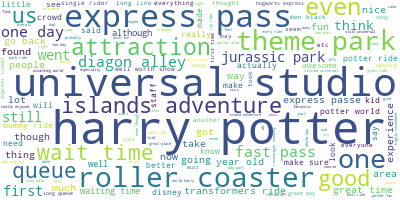

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(rating['rating_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


### Based on the word cloud, we know we can expect words like "Harry Potter", "Express Pass", "Universal Studios", "Roller Coaster", "Wait Time" to come up in our topics.

In [ ]:
# take a random sample of 30,000 reviews from all parks focusing only on review textual data
rating = rating.sample(n=30000)
rating = rating[['review_text']]
rating.head()

review_text
21407  This place seems to be more expensive than Dis...
40319  Rides for all ages. Whole entertainment for ha...
6308   We held 14 day park hopper tickets and visited...
32786  Are you keen on rollercoasters, or perhaps a H...
5946   We did Disney (Epcot and Animal Kingdom) and U...

In [ ]:
# Lemmatization using PoS Tags.
def get_pos_tags(word):
#    """Map PoS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, #adjective
                "N": wordnet.NOUN,#noun
                "V": wordnet.VERB,#verb
                "R": wordnet.ADV} #adverb

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_text(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
  
        #Remove stop words, words fewer than 2 characters
        #Remove some adjectvies 
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

rating['processed_review'] = rating['review_text'].map(preprocess)
rating.head()

review_text  \
21407  This place seems to be more expensive than Dis...   
40319  Rides for all ages. Whole entertainment for ha...   
6308   We held 14 day park hopper tickets and visited...   
32786  Are you keen on rollercoasters, or perhaps a H...   
5946   We did Disney (Epcot and Animal Kingdom) and U...   

                                        processed_review  
21407  [place, expensive, disney, pay, express, ticke...  
40319  [rid, age, entertainment, half, impatient, que...  
6308   [hold, park, hopper, ticket, visit, universal,...  
32786  [keen, rollercoasters, harry, potter, universa...  
5946   [disney, epcot, animal, kingdom, universal, li...

In [ ]:
dictionary = gensim.corpora.Dictionary(rating['processed_review'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(rating))
print (len(dictionary))

0 absolutely
1 allow
2 american
3 announcement
4 anyways
5 area
6 aren
7 average
8 break
9 bring
10 buy
11 couldn
12 daughter
13 difference
14 disney
15 dog
16 doom
17 early
18 expensive
19 express
20 finally
30000
23765


In [ ]:
#Gensim filter_extremes.
dictionary.filter_extremes(no_below=500, no_above=0.70)
len(dictionary)

433

In [ ]:
#passing the tokenized words to doc2bow and convert those to vectors
bow_corpus = [dictionary.doc2bow(doc) for doc in rating['processed_review']] 
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))


Word 0 ("absolutely") appears 1 time.
Word 1 ("allow") appears 1 time.
Word 2 ("area") appears 1 time.
Word 3 ("average") appears 1 time.
Word 4 ("break") appears 1 time.
Word 5 ("bring") appears 1 time.
Word 6 ("buy") appears 1 time.
Word 7 ("couldn") appears 1 time.
Word 8 ("daughter") appears 2 time.
Word 9 ("disney") appears 1 time.
Word 10 ("early") appears 1 time.
Word 11 ("expensive") appears 1 time.
Word 12 ("express") appears 3 time.
Word 13 ("finally") appears 1 time.
Word 14 ("food") appears 2 time.
Word 15 ("go") appears 2 time.
Word 16 ("good") appears 1 time.
Word 17 ("gringotts") appears 1 time.
Word 18 ("half") appears 1 time.
Word 19 ("harry") appears 1 time.
Word 20 ("hour") appears 1 time.
Word 21 ("hours") appears 1 time.
Word 22 ("inside") appears 1 time.
Word 23 ("keep") appears 1 time.
Word 24 ("kid") appears 1 time.
Word 25 ("land") appears 1 time.
Word 26 ("leave") appears 1 time.
Word 27 ("like") appears 3 time.
Word 28 ("line") appears 2 time.
Word 29 ("long"

In [ ]:
dictionary.filter_extremes(no_below=10, no_above=0.9)
len(dictionary)

433

In [ ]:
#create tf-idf model.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.14460160692298585), (1, 0.1272276854736662), (2, 0.10326643382369492), (3, 0.1602562135071873), (4, 0.13659447018988663), (5, 0.117441292575684), (6, 0.10994151817288748), (7, 0.15086608963714368), (8, 0.29827577380242437), (9, 0.0886922871996007), (10, 0.09623219574475325), (11, 0.09503633846443924), (12, 0.18429220274963323), (13, 0.1705500961213376), (14, 0.13801446589531471), (15, 0.10268161625792868), (16, 0.06124405811712184), (17, 0.14130238255190852), (18, 0.13798214061810737), (19, 0.05446536361233044), (20, 0.10195153290440007), (21, 0.09682911388776111), (22, 0.12603663904051046), (23, 0.1621235763506237), (24, 0.07367786424085014), (25, 0.15036504269090675), (26, 0.11049862179680593), (27, 0.18560256737150274), (28, 0.12002493380117674), (29, 0.06767054929523193), (30, 0.06653134727895085), (31, 0.13739227899375905), (32, 0.13768617766867958), (33, 0.0920871874359058), (34, 0.14803962225210526), (35, 0.2783744573890683), (36, 0.024404550782065517), (37, 0.10268161625

In [ ]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)

### Here we have derived a total of 7 topics based on ten keywords to analyze. The results may be slightly different from original presentation since we had to rerun results to combine code, but sentiment remains the same and topics are relatively similar.

In [ ]:
import re
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    print ('Topic:',idx,key_words_only)
    

Topic: 0 place singapore visit food great park universal show rid studios
Topic: 1 house halloween line wait time horror pass park go ride
Topic: 2 ride love mummy transformers park potter harry great amaze universal
Topic: 3 disney park universal staff great potter rid harry ride love
Topic: 4 great park time amaze ride place love rid experience line
Topic: 5 queue express pass ride time wait rid long ticket park
Topic: 6 harry potter park line pass ride wait express ticket time


The following seven topics have been labeled as:

Topic 0: Enjoyable

Topic 1: Halloween

Topic 2: Themes

Topic 3: Harry Potter

Topic 4: Worthwhile

Topic 5: Express Pass

Topic 6: Wait Time

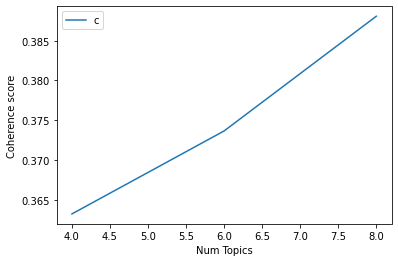

Num Topics = 4  has Coherence Value of 0.3632
Num Topics = 6  has Coherence Value of 0.3737
Num Topics = 8  has Coherence Value of 0.3881


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=rating['processed_review'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=rating['processed_review'], start=4, limit=10, step=2)

# Show graph
import matplotlib.pyplot as plt
limit=10; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Based on the coherence values mapped out here, we can infer that the optimal number of topics is more than 8 topics, since the coherence values are still growing higher. 

In [ ]:
list_in_list=[]

#for the first 4 documents.
doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf[:5])
print('document topics: ', doc_topics)

for each_doc in doc_topics:
    #print (each_doc)
    top_topic = sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    top_topic_2 = sorted(each_doc, key=lambda x: x[1], reverse=True)[1]
    print ("highest", top_topic)
    print ("2nd highest", top_topic_2)
    top_topic_num = top_topic[0]
    top_topic_prob = top_topic[1]
    #Find the corresponding number of dominant topic and its keywords.
    for idx, topic in lda_model_tfidf.print_topics(-1, num_words=20):
        if idx == top_topic_num:
            #print out keywords only (without probability)
            key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
            print ('Topic:',idx,key_words_only)
    #make a dataframe and fill out within each column.        
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])
df1 = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df1)

document topics:  <gensim.interfaces.TransformedCorpus object at 0x7f1f5b6ee990>
highest (6, 0.89283305)
2nd highest (4, 0.01787518)
Topic: 6 harry potter park line pass ride wait express ticket time japanese go universal rid people world crowd great like queue
highest (5, 0.7768584)
2nd highest (1, 0.037272308)
Topic: 5 queue express pass ride time wait rid long ticket park line visit good great go mins place early hours worth
highest (3, 0.85322326)
2nd highest (0, 0.024495086)
Topic: 3 disney park universal staff great potter rid harry ride love time clean better visit go friendly pass studios place like
highest (6, 0.85768664)
2nd highest (4, 0.023784306)
Topic: 6 harry potter park line pass ride wait express ticket time japanese go universal rid people world crowd great like queue
highest (3, 0.7875849)
2nd highest (2, 0.035438046)
Topic: 3 disney park universal staff great potter rid harry ride love time clean better visit go friendly pass studios place like
   Dominant Topic  Pr

#### The dominant topics we can observe from the general topics on all parks are topics 3,5,6. These topics refer to Harry Potter experience, Express Pass option (pay more to cut long lines), and Wait times. 

### We now move on to the topic modeling broken down by each of the three branches to capture any differences we can find on park visitors experience based on the reviews. We begin this analysis with the Singapore branch, followed by the Florida branch, and then the Japan branch. 

In [ ]:
branch =['Universal Studios Singapore']
singapore = rating[rating.branch.isin(branch)].copy()

In [ ]:
rating1 = singapore.sort_values(by =['rating'])
rating1.head()

reviewer  rating       written_date  \
36303   Margarita G     1.0       May 20, 2019   
35529        Andy D     1.0  December 18, 2019   
44436      jojokhoo     1.0      July 24, 2015   
47833  silvermasked     1.0  November 19, 2013   
47532         Rahul     1.0   February 3, 2014   

                                          title  \
36303                  Worst experience in Asia   
35529  USS needs to maintain its park’s quality   
44436        Terrible management, insane queues   
47833                                    Closed   
47532   Very Long queues ...... Poor management   

                                             review_text  \
36303  Today I had the worst experience ever in Asia ...   
35529  Whenever I visited uss i always bring somebody...   
44436  I recently went to Universal Studios with frie...   
47833  the only reason we came back to this crappy li...   
47532  Waited for minimum 1 hour for each ride ...Who...   

                            branch  
36303  Universal Studios Singapore  
35529  Universal Studios Singapore  
44436  Universal Studios Singapore  
47833  Universal Studios Singapore  
47532  Universal Studios Singapore

In [ ]:
rating1 = rating1.sample(n=3000)

rating1 = rating1[['review_text']]

print ("Column Names",rating1.columns.values)
print ("Shape:", rating1.shape)
print (rating1.iloc[:10,:])

Column Names ['review_text']
Shape: (3000, 1)
                                             review_text
44431  It was my 2nd trip to Universal Studio . first...
35327  Amazing experience. IT was Christmastime and t...
47749  One of the best theme parks we've ever been. K...
47965  You don't have to be young to have fun here! W...
45577  We like the rides and the shows. Did not like ...
44394  Visited USS on 27 Jul 2015. Best to start the ...
46981  IT IS a magical amusement park i have seen in ...
42946  I am huge fan of Hollywood movies and this is ...
46304  We visited the place on Saturday, because that...
38262  We had an amazing day at Universal Studios Sin...


In [ ]:
# Lemmatization using PoS Tags.
#
def get_pos_tags(word):
#    """Map PoS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, #adjective
                "N": wordnet.NOUN,#noun
                "V": wordnet.VERB,#verb
                "R": wordnet.ADV} #adverb

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_text(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
  
        #Remove stop words and words fewer than 2 characters.#Remove some adjectvies (e.g. amaze, )
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

rating1['processed_review'] = rating1['review_text'].map(preprocess)
print (rating1.head())

                                             review_text  \
44431  It was my 2nd trip to Universal Studio . first...   
35327  Amazing experience. IT was Christmastime and t...   
47749  One of the best theme parks we've ever been. K...   
47965  You don't have to be young to have fun here! W...   
45577  We like the rides and the shows. Did not like ...   

                                        processed_review  
44431  [trip, universal, studio, time, visit, college...  
35327  [amaze, experience, christmastime, place, supe...  
47749  [best, theme, park, kid, love, pleasant, trans...  
47965  [young, purchase, ticket, travel, agent, belie...  
45577  [like, rid, show, like, minutes, queue, attrac...  


In [ ]:
#mapping between words and the corresponding integers.
dictionary = gensim.corpora.Dictionary(rating1['processed_review'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(rating1))
print (len(dictionary))

0 amaze
1 best
2 climb
3 coaster
4 college
5 couple
6 education
7 friend
8 go
9 happen
10 honeymoon
11 july
12 mummy
13 place
14 roaler
15 rock
16 studio
17 time
18 tour
19 trip
20 universal
3000
6605


In [ ]:
#Gensim filter_extremes.
#Filter out tokens that appear in
#less than 100 documents (absolute number).
#more than 0.7 documents (fraction of total corpus size, not absolute number).
dictionary.filter_extremes(no_below=500, no_above=0.70)
print (len(dictionary))

29


In [ ]:
#Gensim doc2bow (pass the tokenized words to doc2bow and convert those to vectors.)
#For each document, check how many words and how many times those words appear.
bow_corpus = [dictionary.doc2bow(doc) for doc in rating1['processed_review']]
print (len(bow_corpus))
print (bow_corpus[0])
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

3000
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1)]
Word 0 ("go") appears 1 time.
Word 1 ("mummy") appears 1 time.
Word 2 ("place") appears 2 time.
Word 3 ("time") appears 1 time.
Word 4 ("universal") appears 1 time.
Word 5 ("visit") appears 1 time.


In [ ]:
dictionary.filter_extremes(no_below=10, no_above=0.9)
print (len(dictionary))

29


In [ ]:
#create tf-idf model.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.3801608946894569), (1, 0.42700395886470244), (2, 0.6645654336484704), (3, 0.24364679353257387), (4, 0.27798165341481), (5, 0.3079943798650672)]


In [ ]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)

### Similar to the general topics we uncovered, we have generated seven different topics based on the Singapore branch below.

In [ ]:
import re
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    print ('Topic:',idx,key_words_only)

Topic: 0 place singapore visit kid park good great universal rid theme
Topic: 1 ticket wait place rid queue express enjoy time great visit
Topic: 2 food experience park pass express rid singapore good like kid
Topic: 3 worth wait food line visit great park pass time ride
Topic: 4 pass studios universal go express ride singapore rid time queue
Topic: 5 ride roller transformers park mummy kid rid theme great time
Topic: 6 long queue time enjoy experience universal go studios visit place


The following seven topics have been labeled as:

Topic 0: Kid-friendly

Topic 1: Enjoyable

Topic 2: Express Pass

Topic 3: Worthwhile

Topic 4: Long Lines

Topic 5: Themes

Topic 6: Wait Time

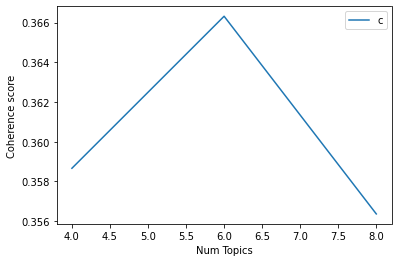

Num Topics = 4  has Coherence Value of 0.3587
Num Topics = 6  has Coherence Value of 0.3663
Num Topics = 8  has Coherence Value of 0.3564


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=rating1['processed_review'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=rating1['processed_review'], start=4, limit=10, step=2)

# Show graph
import matplotlib.pyplot as plt
limit=10; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

The optimal number of topics in this case for the Sinagpore branch is six topics since the coherence value is highest at that point with a coherence value of 0.3663.

In [ ]:
list_in_list=[]

#for the first 4 documents.
doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf[:5])


for each_doc in doc_topics:
    #print (each_doc)
    top_topic = sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    top_topic_2 = sorted(each_doc, key=lambda x: x[1], reverse=True)[1]
    print ("highest", top_topic)
    print ("2nd highest", top_topic_2)
    top_topic_num = top_topic[0]
    top_topic_prob = top_topic[1]
    #Find the corresponding number of dominant topic and its keywords.
    for idx, topic in lda_model_tfidf.print_topics(-1, num_words=20):
        if idx == top_topic_num:
            #print out keywords only (without probability)
            key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
            print ('Topic:',idx,key_words_only)
    #make a dataframe and fill out within each column.        
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])
    #print (list_in_list)
#create pandas dataframe with column names.
df1 = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df1)

highest (0, 0.7385185)
2nd highest (6, 0.043696508)
Topic: 0 place singapore visit kid park good great universal rid theme enjoy worth studios time line ride like mummy long queue
highest (1, 0.7687125)
2nd highest (3, 0.03865981)
Topic: 1 ticket wait place rid queue express enjoy time great visit ride go park kid universal line long experience pass good
highest (0, 0.73310155)
2nd highest (6, 0.044631977)
Topic: 0 place singapore visit kid park good great universal rid theme enjoy worth studios time line ride like mummy long queue
highest (1, 0.78932065)
2nd highest (3, 0.03518303)
Topic: 1 ticket wait place rid queue express enjoy time great visit ride go park kid universal line long experience pass good
highest (6, 0.7251568)
2nd highest (2, 0.04586998)
Topic: 6 long queue time enjoy experience universal go studios visit place rid wait ride theme good park like great singapore mummy
   Dominant Topic  Probability
0               0     0.738518
1               1     0.768713
2       

#### The dominant topics we can observe from the general topics on Singapore branch are 0,1,6. These topics refer to Kid-friendly, Enjoyable experience, and Wait times. 

### We now move on to the next branch: Florida branch. This branch has the most reviews compared to the other two branches.

In [ ]:
branch =['Universal Studios Florida']
florida = rating[rating.branch.isin(branch)].copy()
florida.head()

reviewer  rating  written_date  \
0          Kelly B     2.0  May 30, 2021   
1              Jon     1.0  May 30, 2021   
2          Nerdy P     2.0  May 30, 2021   
3        ran101278     4.0  May 29, 2021   
4  tammies20132015     5.0  May 28, 2021   

                                               title  \
0  Universal is a complete Disaster - stick with ...   
1                               Food is hard to get.   
2                                       Disappointed   
3                                         My opinion   
4                  The Bourne Stuntacular...MUST SEE   

                                         review_text  \
0  We went to Universal over Memorial Day weekend...   
1  The food service is horrible. I’m not reviewin...   
2  I booked this vacation mainly to ride Hagrid m...   
3  When a person tries the test seat for the ride...   
4  Ok, I can't stress enough to anyone and everyo...   

                      branch  
0  Universal Studios Florida  
1  Universal Studios Florida  
2  Universal Studios Florida  
3  Universal Studios Florida  
4  Universal Studios Florida

In [ ]:
#export some random rows for the manual check-up.
rating2 = florida.sample(n=30000)

rating2 = rating2[['review_text']]

print ("Column Names",rating2.columns.values)
print ("Shape:", rating2.shape)

Column Names ['review_text']
Shape: (30000, 1)


In [ ]:
# Lemmatization using PoS Tags.
#
def get_pos_tags(word):
#    """Map PoS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, #adjective
                "N": wordnet.NOUN,#noun
                "V": wordnet.VERB,#verb
                "R": wordnet.ADV} #adverb

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_text(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
  
        #Remove stop words and words fewer than 2 characters.#Remove some adjectvies (e.g. amaze, )
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

rating2['processed_review'] = rating2['review_text'].map(preprocess)
print (rating2.head())

                                             review_text  \
2249   This was our first time to visit Universal Stu...   
1586   Again loved the park - so much going on to do ...   
27628  As with my other review for Islands of Adventu...   
18454  The Transformers is a must ride. The action an...   
25683  I loved this place much more my last trip ten ...   

                                        processed_review  
2249   [time, visit, universal, studios, florida, fam...  
1586   [love, park, go, try, jimmy, fallon, race, yor...  
27628  [review, islands, adventure, start, say, husba...  
18454  [transformers, ride, action, realistic, feel, ...  
25683  [love, place, trip, years, visit, park, orland...  


In [ ]:
#mapping between words and the corresponding integers.
dictionary = gensim.corpora.Dictionary(rating2['processed_review'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(rating2))
print (len(dictionary))

0 access
1 alley
2 allow
3 appreciate
4 area
5 areas
6 book
7 cabana
8 convenient
9 daughter
10 diagon
11 disappoint
12 earlier
13 enjoy
14 entire
15 excellent
16 experience
17 fallon
18 family
19 fantastic
20 favorite
30000
21719


In [ ]:
#Gensim filter_extremes.
#Filter out tokens that appear in
#less than 100 documents (absolute number).
#more than 0.7 documents (fraction of total corpus size, not absolute number).
dictionary.filter_extremes(no_below=10, no_above=0.90)
print (len(dictionary))

4879


In [ ]:
#Gensim doc2bow (pass the tokenized words to doc2bow and convert those to vectors.)
#For each document, check how many words and how many times those words appear.
bow_corpus = [dictionary.doc2bow(doc) for doc in rating2['processed_review']]
print (len(bow_corpus))
print (bow_corpus[0])
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

30000
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 4), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 3), (58, 5), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)]
Word 0 ("access") appears 1 time.
Word 1 ("alley") appears 1 time.
Word 2 ("allow") appears 1 time.
Word 3 ("appreciate") appears 1 time.
Word 4 ("area") appears 4 time.
Word 5 ("areas") appears 2 time.
Word 6 ("book") appears 1 time.
Word 7 ("cabana") appears 1 time.
Word 8 ("convenient") appears 1 time.
Word 9 ("daughter") a

In [ ]:
dictionary.filter_extremes(no_below=10, no_above=0.9)
print (len(dictionary))

4879


In [ ]:
#create tf-idf model.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.10660543725298993), (1, 0.06685732019289384), (2, 0.0878055932525648), (3, 0.13313353839814018), (4, 0.2612508340159778), (5, 0.17501160462592597), (6, 0.0939866283654082), (7, 0.14442494105563733), (8, 0.1505924979942035), (9, 0.09755698259349371), (10, 0.06898777292206898), (11, 0.07511574395750167), (12, 0.1341136180367828), (13, 0.04625005775497493), (14, 0.10140525757005261), (15, 0.08788606534500178), (16, 0.05085480517156026), (17, 0.10463398837793439), (18, 0.055129005477893775), (19, 0.07818758852580505), (20, 0.08131846729350924), (21, 0.12193028360133362), (22, 0.08021611662433459), (23, 0.11608738571729625), (24, 0.11078094305054835), (25, 0.14132210410086668), (26, 0.03421812143508593), (27, 0.029597141375286826), (28, 0.028522879826129745), (29, 0.12245832714979775), (30, 0.07237449989696249), (31, 0.09087608650386203), (32, 0.16187695457272888), (33, 0.09897030086551702), (34, 0.10546654815892498), (35, 0.10045628022654687), (36, 0.13782903567431384), (37, 0.04068

In [ ]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)

To remain consistent, we have generated seven topics based on keywords for this branch as well.

In [ ]:
import re
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    print ('Topic:',idx,key_words_only)
    

Topic: 0 ride love great potter harry transformers rid simpsons park visit
Topic: 1 park time great rid pass wait universal line love ride
Topic: 2 great park time love ride universal rid visit place go
Topic: 3 great love horror ride park halloween time rid universal place
Topic: 4 pass time park line rid wait great universal ride express
Topic: 5 ride great rid park love visit potter good harry time
Topic: 6 ride line park pass wait ticket express time universal rid


The following seven topics have been labeled as:

Topic 0: Themes

Topic 1: Long Line

Topic 2: Enjoyable

Topic 3: Halloween

Topic 4: Express Pass

Topic 5: Harry Potter

Topic 6: Wait Time

/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


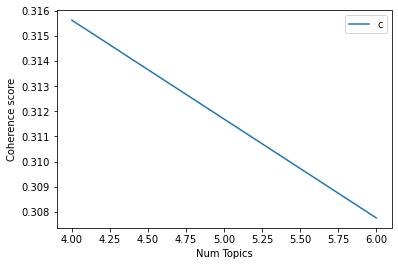

Num Topics = 4  has Coherence Value of 0.3156
Num Topics = 6  has Coherence Value of 0.3078
Num Topics = 8  has Coherence Value of nan


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=rating1['processed_review'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=rating1['processed_review'], start=4, limit=10, step=2)

# Show graph
import matplotlib.pyplot as plt
limit=10; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

The optimal number of topics is four topics or less based on the fact that the coherence value is the highest at four topic with coherence value of 0.3156.

In [ ]:
list_in_list=[]

#for the first 4 documents.
doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf[:5])


for each_doc in doc_topics:
    #print (each_doc)
    top_topic = sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    top_topic_2 = sorted(each_doc, key=lambda x: x[1], reverse=True)[1]
    print ("highest", top_topic)
    print ("2nd highest", top_topic_2)
    top_topic_num = top_topic[0]
    top_topic_prob = top_topic[1]
    #Find the corresponding number of dominant topic and its keywords.
    for idx, topic in lda_model_tfidf.print_topics(-1, num_words=20):
        if idx == top_topic_num:
            #print out keywords only (without probability)
            key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
            print ('Topic:',idx,key_words_only)
    #make a dataframe and fill out within each column.        
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])
    #print (list_in_list)
#create pandas dataframe with column names.
df1 = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df1)

highest (5, 0.9017076)
2nd highest (4, 0.016403874)
Topic: 5 ride great rid park love visit potter good harry time universal place go like enjoy amaze wait attractions studios kid
highest (0, 0.8178754)
2nd highest (1, 0.03049585)
Topic: 0 ride love great potter harry transformers rid simpsons park visit enjoy mummy amaze universal roller like time place good kid
highest (6, 0.91418463)
2nd highest (1, 0.014313448)
Topic: 6 ride line park pass wait ticket express time universal rid go disney people potter harry minutes like want long experience
highest (0, 0.8351591)
2nd highest (6, 0.027485136)
Topic: 0 ride love great potter harry transformers rid simpsons park visit enjoy mummy amaze universal roller like time place good kid
highest (6, 0.88583076)
2nd highest (0, 0.019055197)
Topic: 6 ride line park pass wait ticket express time universal rid go disney people potter harry minutes like want long experience
   Dominant Topic  Probability
0               5     0.901708
1              

#### The dominant topics we can observe from the general topics on Florida branch are topics 0,5,6. These topics refer to Themes, Harry Potter, and Wait times. 

### We now move on to the last park branch: Japan branch. The Japanese branch has the lowest number of reviews. After this, we move on to the breakdown of positive vs. negative review topics.

In [ ]:
branch =['Universal Studios Japan']
japan = rating[rating.branch.isin(branch)].copy()
japan.head()

reviewer  rating       written_date  \
30621         Star     5.0       May 27, 2021   
30622   Marcello M     1.0      April 5, 2021   
30623  mistermark8     5.0  February 21, 2021   
30624         Thea     5.0   December 7, 2020   
30625         Lisa     4.0  November 18, 2020   

                                                   title  \
30621                                        日本你有參考資料同相片   
30622                                              値段が高い   
30623  smaller than the US counterparts, great experi...   
30624                                       Great Place!   
30625                                   Once is e ought.   

                                             review_text  \
30621  日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...   
30622  too expensive and nothing special。i had to thr...   
30623  Love USJ! There's something they do different ...   
30624  We went to USJ without purchasing any tickets ...   
30625  I buy the annual pass each year and I wonder w...   

                        branch  
30621  Universal Studios Japan  
30622  Universal Studios Japan  
30623  Universal Studios Japan  
30624  Universal Studios Japan  
30625  Universal Studios Japan

In [ ]:
rating3 = japan.sample(n=3000)

rating3 = rating3[['review_text']]

print ("Column Names",rating3.columns.values)
print ("Shape:", rating3.shape)
print (rating3.iloc[:10,:])

Column Names ['review_text']
Shape: (3000, 1)
                                             review_text
33660  Best atmosphere for Christmas in Osaka.  We co...
30730  the overall impression of this USJ Osaka was s...
32777  We went on Holloween day and the lines for mos...
33241  If you like thrilling rides, then USJ is the p...
30649  Make sure to get an express pass ticket becaus...
32360  I read a few bad reviews before we came. This ...
34788  Like Spider-Man inside train most! Like Spider...
31443  We had 5 days in Tokyo but wanted to make a tr...
32158  As soon as you get there, you know they are no...
30867  I went there to hang out with some friends and...


In [ ]:
# Lemmatization using PoS Tags.
#
def get_pos_tags(word):
#    """Map PoS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, #adjective
                "N": wordnet.NOUN,#noun
                "V": wordnet.VERB,#verb
                "R": wordnet.ADV} #adverb

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_text(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
  
        #Remove stop words and words fewer than 2 characters.#Remove some adjectvies (e.g. amaze, )
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

rating3['processed_review'] = rating3['review_text'].map(preprocess)
print (rating3.head())

                                             review_text  \
33660  Best atmosphere for Christmas in Osaka.  We co...   
30730  the overall impression of this USJ Osaka was s...   
32777  We went on Holloween day and the lines for mos...   
33241  If you like thrilling rides, then USJ is the p...   
30649  Make sure to get an express pass ticket becaus...   

                                        processed_review  
33660  [best, atmosphere, christmas, osaka, conclude,...  
30730  [overall, impression, osaka, small, crowd, par...  
32777  [go, holloween, line, attractions, wait, best,...  
33241  [like, thrill, rid, place, different, kinds, r...  
30649  [sure, express, pass, ticket, long, line, wiza...  


In [ ]:
#mapping between words and the corresponding integers.
dictionary = gensim.corpora.Dictionary(rating3['processed_review'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(rating3))
print (len(dictionary))

0 add
1 adventure
2 annual
3 area
4 atmosphere
5 available
6 best
7 blackout
8 booths
9 buy
10 castle
11 children
12 christmas
13 close
14 conclude
15 consider
16 current
17 date
18 days
19 express
20 fast
3000
7175


In [ ]:
#Gensim filter_extremes.
#Filter out tokens that appear in
#less than 100 documents (absolute number).
#more than 0.7 documents (fraction of total corpus size, not absolute number).
dictionary.filter_extremes(no_below=500, no_above=0.70)
print (len(dictionary))

33


In [ ]:
#Gensim doc2bow (pass the tokenized words to doc2bow and convert those to vectors.)
#For each document, check how many words and how many times those words appear.
bow_corpus = [dictionary.doc2bow(doc) for doc in rating3['processed_review']]
print (len(bow_corpus))
print (bow_corpus[0])
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

3000
[(0, 3), (1, 3), (2, 1), (3, 1), (4, 1), (5, 2), (6, 5), (7, 1), (8, 3), (9, 2), (10, 2), (11, 3), (12, 1), (13, 1), (14, 2)]
Word 0 ("express") appears 3 time.
Word 1 ("harry") appears 3 time.
Word 2 ("hours") appears 1 time.
Word 3 ("japan") appears 1 time.
Word 4 ("japanese") appears 1 time.
Word 5 ("park") appears 2 time.
Word 6 ("pass") appears 5 time.
Word 7 ("queue") appears 1 time.
Word 8 ("rid") appears 3 time.
Word 9 ("ride") appears 2 time.
Word 10 ("theme") appears 2 time.
Word 11 ("ticket") appears 3 time.
Word 12 ("time") appears 1 time.
Word 13 ("visit") appears 1 time.
Word 14 ("wait") appears 2 time.


In [ ]:
dictionary.filter_extremes(no_below=10, no_above=0.9)
print (len(dictionary))

33


In [ ]:
#create tf-idf model.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.3690539146389154), (1, 0.19679826595366112), (2, 0.18283705336081388), (3, 0.1935434188171965), (4, 0.15917686138665116), (5, 0.14975283796716402), (6, 0.4914616924783116), (7, 0.13441719113618822), (8, 0.20230923108113638), (9, 0.1781029899859505), (10, 0.3596982902644525), (11, 0.4141787385051884), (12, 0.07716940213905922), (13, 0.13503692408670626), (14, 0.22146957006934836)]


In [ ]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)

Generated seven topics for Japan branch to remain consistent.

In [ ]:
import re
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    print ('Topic:',idx,key_words_only)
    

Topic: 0 studios visit universal line like attractions rid time ride potter
Topic: 1 queue worth enjoy ride rid food pass time express wait
Topic: 2 long line wait go queue ride harry time potter pass
Topic: 3 world ride express pass good wait potter park harry line
Topic: 4 rid experience crowd go pass park time theme express queue
Topic: 5 great japanese japan park theme attractions visit place universal rid
Topic: 6 ticket place park time people queue express ride like potter


The following seven topics have been labeled as:

Topic 0: Rides

Topic 1: Worthwhile

Topic 2: Long Line

Topic 3: Harry Potter

Topic 4: Express Pass

Topic 5: Attractions

Topic 6: Wait Time

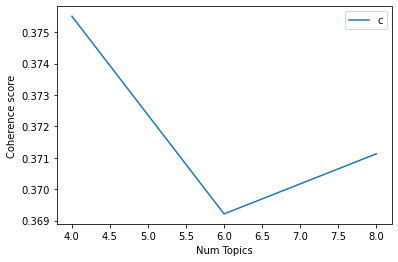

Num Topics = 4  has Coherence Value of 0.3755
Num Topics = 6  has Coherence Value of 0.3692
Num Topics = 8  has Coherence Value of 0.3711


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=rating3['processed_review'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=rating3['processed_review'], start=4, limit=10, step=2)

# Show graph
import matplotlib.pyplot as plt
limit=10; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In this case, the optimal number of topics is 8 or more topics since the coherence value is highest at 8 topics and follows a positive trend indicating the optimal number of topics can be higher.

In [ ]:
list_in_list=[]

#for the first 4 documents.
doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf[:5])


for each_doc in doc_topics:
    #print (each_doc)
    top_topic = sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    top_topic_2 = sorted(each_doc, key=lambda x: x[1], reverse=True)[1]
    print ("highest", top_topic)
    print ("2nd highest", top_topic_2)
    top_topic_num = top_topic[0]
    top_topic_prob = top_topic[1]
    #Find the corresponding number of dominant topic and its keywords.
    for idx, topic in lda_model_tfidf.print_topics(-1, num_words=20):
        if idx == top_topic_num:
            #print out keywords only (without probability)
            key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
            print ('Topic:',idx,key_words_only)
    #make a dataframe and fill out within each column.        
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])
    #print (list_in_list)
#create pandas dataframe with column names.
df1 = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df1)

highest (2, 0.80677974)
2nd highest (5, 0.032306697)
Topic: 2 long line wait go queue ride harry time potter pass ticket park rid good express hours place people japanese visit
highest (0, 0.7713481)
2nd highest (1, 0.03815589)
Topic: 0 studios visit universal line like attractions rid time ride potter wait harry hours park japan pass go enjoy place worth
highest (3, 0.79811823)
2nd highest (5, 0.03374337)
Topic: 3 world ride express pass good wait potter park harry line time rid ticket attractions great theme food visit experience go
highest (6, 0.7527369)
2nd highest (3, 0.041318826)
Topic: 6 ticket place park time people queue express ride like potter go harry food attractions visit universal hours experience rid japanese
highest (2, 0.7861378)
2nd highest (3, 0.035703935)
Topic: 2 long line wait go queue ride harry time potter pass ticket park rid good express hours place people japanese visit
   Dominant Topic  Probability
0               2     0.806780
1               0     0.771

#### The dominant topics we can observe from the general topics on Japan branch are 0,2,3. These topics refer to Rides, Long Lines, Harry Potter.

### At this point, we are now analyzing the difference of topics of positive reviews and negative reviews. We do this due to the fact that there are more positive reviews overall, and we would need to split the data to uncover the negative review topics to learn more. This will allow us to see more than just looking at all reviews as we have done initially.

In [ ]:
#assign reviews with score > 3 as positive sentiment, score  < 3 is negative sentiment
#reviews with score = 3 are dropped because they are neutral
#Categories are literal labels, but it is better for machine learning algorithms just to work with numbers.
#so we will encode them using LabelEncoder, which encode labels with value between 0 and n_classes-1.

#Class LabelEncoder allows to encode labels with values between 0 and n_classes-1.

rating['label'] = rating.rating.map({1:0, 2:0, 4:1, 5:1})

#How many columns and rows?
print ("Shape:", rating.shape)

#Column names?
print ("Column Names",rating.columns.values)
print (rating.iloc[:10,:])

Shape: (50904, 5)
Column Names ['rating' 'title' 'review_text' 'branch' 'label']
   rating                                              title  \
0     2.0  Universal is a complete Disaster - stick with ...   
1     1.0                               Food is hard to get.   
2     2.0                                       Disappointed   
3     4.0                                         My opinion   
4     5.0                  The Bourne Stuntacular...MUST SEE   
5     1.0                             This is not a vacation   
6     2.0                                      Expected More   
7     2.0                                  Disapointing.....   
8     1.0        Greed makes for a terrible guest experience   
9     4.0                    Good first time visit with kids   

                                         review_text  \
0  We went to Universal over Memorial Day weekend...   
1  The food service is horrible. I’m not reviewin...   
2  I booked this vacation mainly to ride Hagri

In [ ]:
#convert rating float to integer
#drop the reviewer, title, written_date, branch columns from the dataframe now for analysis of all branches
rating['rating'] = rating['rating'].astype(int)
rating = rating.drop(['title', 'branch'], axis = 1)
rating.head()

rating                                        review_text  label
0       2  We went to Universal over Memorial Day weekend...    0.0
1       1  The food service is horrible. I’m not reviewin...    0.0
2       2  I booked this vacation mainly to ride Hagrid m...    0.0
3       4  When a person tries the test seat for the ride...    1.0
4       5  Ok, I can't stress enough to anyone and everyo...    1.0

### We will start looking at the positive review topics first based on the label 1, which indicates positive reviews.

In [ ]:
positive =[1.0]
positive1 = rating[rating.label.isin(positive)].copy()
positive1.head()

rating                                        review_text  label
3        4  When a person tries the test seat for the ride...    1.0
4        5  Ok, I can't stress enough to anyone and everyo...    1.0
9        4  We spent 6 nights on site at Sapphire Falls as...    1.0
11       5  Universal Adventure Park was the best out of t...    1.0
14       5  For all ages rides and restaurants lots of pho...    1.0

In [ ]:
rating4 = positive1.sample(n=3000)

rating4 = rating4[['review_text']]

print ("Column Names",rating4.columns.values)
print ("Shape:", rating4.shape)
print (rating4.iloc[:10,:])

Column Names ['review_text']
Shape: (3000, 1)
                                             review_text
48790  If you have kids between 6 and 99 years old. G...
46330  We went to Universal Studios with our children...
24694  There's some really impressive rides, and you ...
6627   Brilliant experience for the entire family! Vi...
49158  I visited universal on my own (day off from wo...
4563   We love the detail of all the Harry Potter rel...
13618  Now this is where the real magic happens!! Oh ...
5466   Came a few years ago with the teenagers and fi...
16482  We are not big thrill riders so we enjoyed the...
36423  My sister will never forget this because i tre...


In [ ]:
# Lemmatization using PoS Tags.
#
def get_pos_tags(word):
#    """Map PoS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, #adjective
                "N": wordnet.NOUN,#noun
                "V": wordnet.VERB,#verb
                "R": wordnet.ADV} #adverb

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_text(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
  
        #Remove stop words and words fewer than 2 characters.#Remove some adjectvies (e.g. amaze, )
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

rating4['processed_review'] = rating4['review_text'].map(preprocess)
print (rating4.head())

                                             review_text  \
48790  If you have kids between 6 and 99 years old. G...   
46330  We went to Universal Studios with our children...   
24694  There's some really impressive rides, and you ...   
6627   Brilliant experience for the entire family! Vi...   
49158  I visited universal on my own (day off from wo...   

                                        processed_review  
48790  [kid, years, universal, studios, disappoint, t...  
46330  [go, universal, studios, children, family, exc...  
24694  [impressive, rid, easily, immerse, park, atten...  
6627   [brilliant, experience, entire, family, visit,...  
49158  [visit, universal, work, like, rid, love, look...  


In [ ]:
#mapping between words and the corresponding integers.
dictionary = gensim.corpora.Dictionary(rating2['processed_review'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(rating2))
print (len(dictionary))

0 access
1 alley
2 allow
3 appreciate
4 area
5 areas
6 book
7 cabana
8 convenient
9 daughter
10 diagon
11 disappoint
12 earlier
13 enjoy
14 entire
15 excellent
16 experience
17 fallon
18 family
19 fantastic
20 favorite
30000
21719


In [ ]:
dictionary.filter_extremes(no_below=500, no_above=0.70)
print (len(dictionary))

438


In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in rating2['processed_review']]
print (len(bow_corpus))
print (bow_corpus[0])
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

30000
[(0, 1), (1, 1), (2, 1), (3, 4), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 3), (42, 5), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)]
Word 0 ("access") appears 1 time.
Word 1 ("alley") appears 1 time.
Word 2 ("allow") appears 1 time.
Word 3 ("area") appears 4 time.
Word 4 ("areas") appears 2 time.
Word 5 ("book") appears 1 time.
Word 6 ("daughter") appears 1 time.
Word 7 ("diagon") appears 1 time.
Word 8 ("disappoint") appears 1 time.
Word 9 ("enjoy") appears 1 time.
Word 10 ("entire") appears 1 time.
Word 11 ("excellent") appears 1 time.
Word 12 ("experience") appears 1 time.
Word 13 ("fallon") appears 1 time.
Word 14 ("family") appears 1 time.
Word 1

In [ ]:
dictionary.filter_extremes(no_below=10, no_above=0.9)
print (len(dictionary))

438


In [ ]:
#create tf-idf model.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.16046061516223517), (1, 0.10063245367861748), (2, 0.1321634230959115), (3, 0.3932301261366954), (4, 0.2634243661715138), (5, 0.1414670076231483), (6, 0.1468410415425075), (7, 0.10383917337609631), (8, 0.11306288679428138), (9, 0.06961476740666), (10, 0.15263339684786278), (11, 0.13228454826352548), (12, 0.07654575162445865), (13, 0.15749322524851445), (14, 0.0829792021890231), (15, 0.11768657280705937), (16, 0.12239911605072121), (17, 0.12073987735654002), (18, 0.17473267597568612), (19, 0.16674551250100494), (20, 0.051504510057398215), (21, 0.044549092752667906), (22, 0.042932133304213076), (23, 0.108936814807727), (24, 0.13678507513027643), (25, 0.14896834316231794), (26, 0.15874637947835032), (27, 0.15120501296578565), (28, 0.20745782224065473), (29, 0.06123811466878318), (30, 0.15517472982518618), (31, 0.15631853778747257), (32, 0.09096358598058565), (33, 0.12542545269311764), (34, 0.03903022520089978), (35, 0.11473212882486344), (36, 0.15548370760882813), (37, 0.04262587154

We have generated seven topics for positive reviews similar to branches analysis.

In [ ]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
import re
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    print ('Topic:',idx,key_words_only)
    

Topic: 0 ride park potter harry alley line express diagon pass universal
Topic: 1 great disney park rid place love universal better roller kid
Topic: 2 pass time wait park year line universal rid visit go
Topic: 3 ride horror halloween house nights great fast pass time rid
Topic: 4 ride love visit universal potter harry great park amaze adventure
Topic: 5 pass line wait express park ticket ride time disney universal
Topic: 6 great lot place love good rid food park ride staff


The following seven topics have been labeled as:

Topic 0: Harry Potter

Topic 1: Kid-Friendly

Topic 2: Wait Time

Topic 3: Halloween

Topic 4: Enjoyable

Topic 5: Express Pass

Topic 6: Love

In [ ]:
# include the probabilities for each of the ten keywords for the seven topics
pprint(lda_model_tfidf.print_topics())

[(0,
  '0.011*"ride" + 0.010*"park" + 0.009*"potter" + 0.009*"harry" + '
  '0.009*"alley" + 0.009*"line" + 0.008*"express" + 0.008*"diagon" + '
  '0.008*"pass" + 0.008*"universal"'),
 (1,
  '0.013*"great" + 0.012*"disney" + 0.011*"park" + 0.011*"rid" + 0.011*"place" '
  '+ 0.011*"love" + 0.011*"universal" + 0.010*"better" + 0.010*"roller" + '
  '0.010*"kid"'),
 (2,
  '0.013*"pass" + 0.012*"time" + 0.011*"wait" + 0.010*"park" + 0.010*"year" + '
  '0.010*"line" + 0.009*"universal" + 0.009*"rid" + 0.009*"visit" + '
  '0.009*"go"'),
 (3,
  '0.014*"ride" + 0.012*"horror" + 0.011*"halloween" + 0.011*"house" + '
  '0.009*"nights" + 0.009*"great" + 0.009*"fast" + 0.008*"pass" + 0.008*"time" '
  '+ 0.008*"rid"'),
 (4,
  '0.014*"ride" + 0.013*"love" + 0.011*"visit" + 0.011*"universal" + '
  '0.011*"potter" + 0.011*"harry" + 0.011*"great" + 0.010*"park" + '
  '0.010*"amaze" + 0.010*"adventure"'),
 (5,
  '0.014*"pass" + 0.013*"line" + 0.012*"wait" + 0.012*"express" + 0.011*"park" '
  '+ 0.010*"tic

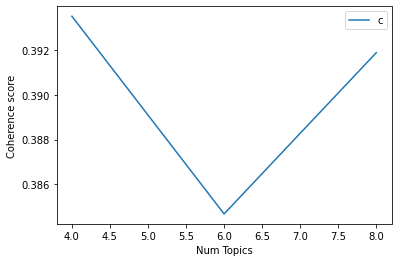

Num Topics = 4  has Coherence Value of 0.3935
Num Topics = 6  has Coherence Value of 0.3847
Num Topics = 8  has Coherence Value of 0.3919


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=rating4['processed_review'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=rating4['processed_review'], start=4, limit=10, step=2)

# Show graph
import matplotlib.pyplot as plt
limit=10; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In this case, the optimal number of topics is 8 or more topics since the coherence value is highest at 8 and continue on a positive trend indicating the coherence value continues to grow. 

In [ ]:
list_in_list=[]

#for the first 4 documents.
doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf[:5])
print('document topics: ', doc_topics)

for each_doc in doc_topics:
    #print (each_doc)
    top_topic = sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    top_topic_2 = sorted(each_doc, key=lambda x: x[1], reverse=True)[1]
    print ("highest", top_topic)
    print ("2nd highest", top_topic_2)
    top_topic_num = top_topic[0]
    top_topic_prob = top_topic[1]
    #Find the corresponding number of dominant topic and its keywords.
    for idx, topic in lda_model_tfidf.print_topics(-1, num_words=20):
        if idx == top_topic_num:
            #print out keywords only (without probability)
            key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
            print ('Topic:',idx,key_words_only)
    #make a dataframe and fill out within each column.        
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])
    #print (list_in_list)
#create pandas dataframe with column names.
df1 = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df1)

document topics:  <gensim.interfaces.TransformedCorpus object at 0x7f1f4cd2e090>
highest (0, 0.49034378)
2nd highest (1, 0.41430497)
Topic: 0 ride park potter harry alley line express diagon pass universal time wait go ticket hogwarts rid train experience like wand
highest (3, 0.79231757)
2nd highest (1, 0.03469609)
Topic: 3 ride horror halloween house nights great fast pass time rid mummy go park transformers love wait good rock universal night
highest (2, 0.8940355)
2nd highest (3, 0.01769273)
Topic: 2 pass time wait park year line universal rid visit go great ticket disney family express fast love ride recommend expensive
highest (6, 0.80649436)
2nd highest (0, 0.03227861)
Topic: 6 great lot place love good rid food park ride staff amaze clean harry potter time age visit awesome show enjoy
highest (0, 0.8637378)
2nd highest (3, 0.022757899)
Topic: 0 ride park potter harry alley line express diagon pass universal time wait go ticket hogwarts rid train experience like wand
   Dominant

#### The dominant topics we can observe from the positive review topics on all parks are topics 0,2,6. These topics refer to Harry Potter, Wait Times, and Love for the park experience.

Lastly, we analyze the negative review topics as indicated by the label 0. This is the final part of our main analysis. The additional analysis will focus on the impact of pandemic on the parks.

In [ ]:
#negative review topics
negative =[0.0]
negative1 = rating[rating.label.isin(negative)].copy()
negative1.head()

rating                                        review_text  label
0       2  We went to Universal over Memorial Day weekend...    0.0
1       1  The food service is horrible. I’m not reviewin...    0.0
2       2  I booked this vacation mainly to ride Hagrid m...    0.0
5       1  Worst experience I have ever had the rides are...    0.0
6       2  I just expected more. Alot of waiting around, ...    0.0

In [ ]:
rating5 = negative1.sample(n=3000)

rating5 = rating5[['review_text']]

print ("Column Names",rating5.columns.values)
print ("Shape:", rating5.shape)
print (rating5.iloc[:10,:])

Column Names ['review_text']
Shape: (3000, 1)
                                             review_text
18183  it was a neat ride, but compared to everything...
45507  Among all the theme park I visited through out...
6066   Very disappointing ride not worth the wait in ...
21632  The place should be called Universal Studios M...
27452  if you don't have Express Pass it's not worth ...
3499   We came expecting excitement,thrills and memor...
29558  After paying over £500 for our tickets to this...
28931  Just returned from a trip to Orlando, FL. We p...
20956  Rides, Rides, and more rides. $170 for two peo...
10083  I love roller coaster but not here. I am 6'5" ...


In [ ]:
# Lemmatization using PoS Tags.
#
def get_pos_tags(word):
#    """Map PoS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, #adjective
                "N": wordnet.NOUN,#noun
                "V": wordnet.VERB,#verb
                "R": wordnet.ADV} #adverb

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_text(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
  
        #Remove stop words and words fewer than 2 characters.#Remove some adjectvies (e.g. amaze, )
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

rating5['processed_review'] = rating5['review_text'].map(preprocess)
print (rating5.head())

                                             review_text  \
18183  it was a neat ride, but compared to everything...   
45507  Among all the theme park I visited through out...   
6066   Very disappointing ride not worth the wait in ...   
21632  The place should be called Universal Studios M...   
27452  if you don't have Express Pass it's not worth ...   

                                        processed_review  
18183  [neat, ride, compare, time, replace, ride, years]  
45507  [theme, park, visit, world, smallest, world, c...  
6066   [disappoint, ride, worth, wait, line, earthqua...  
21632  [place, call, universal, studios, mall, like, ...  
27452  [express, pass, worth, spend, wait, line, hour...  


In [ ]:
#mapping between words and the corresponding integers.
dictionary = gensim.corpora.Dictionary(rating5['processed_review'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(rating1))
print (len(dictionary))

0 compare
1 neat
2 replace
3 ride
4 time
5 years
6 activity
7 area
8 attraction
9 battlefield
10 board
11 capacity
12 class
13 consider
14 decide
15 double
16 english
17 expect
18 famous
19 feel
20 firework
3000
9547


In [ ]:
#Gensim filter_extremes.
#Filter out tokens that appear in
#less than 100 documents (absolute number).
#more than 0.7 documents (fraction of total corpus size, not absolute number).
dictionary.filter_extremes(no_below=500, no_above=0.70)
print (len(dictionary))

39


In [ ]:
#Gensim doc2bow (pass the tokenized words to doc2bow and convert those to vectors.)
#For each document, check how many words and how many times those words appear.
bow_corpus = [dictionary.doc2bow(doc) for doc in rating5['processed_review']]
print (len(bow_corpus))
print (bow_corpus[0])
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

3000
[(0, 2), (1, 1)]
Word 0 ("ride") appears 2 time.
Word 1 ("time") appears 1 time.


In [ ]:
dictionary.filter_extremes(no_below=10, no_above=0.9)
print (len(dictionary))

39


In [ ]:
#create tf-idf model.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.9115633089442002), (1, 0.4111597424197806)]


Similar to all the other breakdowns, we generated seven topics and 10 keywords for each.

In [ ]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
import re
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    print ('Topic:',idx,key_words_only)
    

Topic: 0 queue express pass minutes wait time rid people ride want
Topic: 1 rid visit price park ticket pass ride money pay food
Topic: 2 harry potter park ride universal disney studios experience rid waste
Topic: 3 queue staff place experience ticket visit rid park disney go
Topic: 4 tell disappoint wait line ride pass time park go ticket
Topic: 5 line food ride wait disney people hours harry potter hour
Topic: 6 ticket line park pass ride want rid like think spend


The following seven topics have been labeled as:

Topic 0: Express Pass

Topic 1: Ticket Prices

Topic 2: Disney

Topic 3: Staff Quality 

Topic 4: Disapointing 

Topic 5: Wait Time

Topic 6: Long Lines

In [ ]:
# included probabilities with each keyword for the following seven topics generated
pprint(lda_model_tfidf.print_topics())

[(0,
  '0.098*"queue" + 0.055*"express" + 0.047*"pass" + 0.043*"minutes" + '
  '0.043*"wait" + 0.033*"time" + 0.032*"rid" + 0.032*"people" + 0.030*"ride" + '
  '0.029*"want"'),
 (1,
  '0.058*"rid" + 0.057*"visit" + 0.053*"price" + 0.047*"park" + 0.041*"ticket" '
  '+ 0.041*"pass" + 0.038*"ride" + 0.037*"money" + 0.037*"pay" + 0.036*"food"'),
 (2,
  '0.063*"harry" + 0.062*"potter" + 0.057*"park" + 0.056*"ride" + '
  '0.048*"universal" + 0.040*"disney" + 0.035*"studios" + 0.034*"experience" + '
  '0.032*"rid" + 0.029*"waste"'),
 (3,
  '0.081*"queue" + 0.076*"staff" + 0.065*"place" + 0.035*"experience" + '
  '0.034*"ticket" + 0.032*"visit" + 0.032*"rid" + 0.032*"park" + '
  '0.031*"disney" + 0.030*"go"'),
 (4,
  '0.056*"tell" + 0.048*"disappoint" + 0.047*"wait" + 0.043*"line" + '
  '0.042*"ride" + 0.042*"pass" + 0.036*"time" + 0.036*"park" + 0.036*"go" + '
  '0.031*"ticket"'),
 (5,
  '0.079*"line" + 0.050*"food" + 0.046*"ride" + 0.045*"wait" + 0.043*"disney" '
  '+ 0.042*"people" + 0.037*

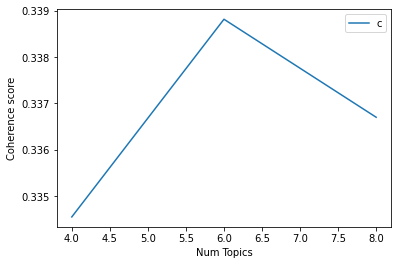

Num Topics = 4  has Coherence Value of 0.3346
Num Topics = 6  has Coherence Value of 0.3388
Num Topics = 8  has Coherence Value of 0.3367


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=rating5['processed_review'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=rating5['processed_review'], start=4, limit=10, step=2)

# Show graph
import matplotlib.pyplot as plt
limit=10; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

The optimal number of topics for negative reviews is six topics because the coherence value is the highest at six topics with a coherence value of 0.3388.

In [ ]:
list_in_list=[]

#for the first 4 documents.
doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf[:5])
print('document topics: ', doc_topics)

for each_doc in doc_topics:
    #print (each_doc)
    top_topic = sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    top_topic_2 = sorted(each_doc, key=lambda x: x[1], reverse=True)[1]
    print ("highest", top_topic)
    print ("2nd highest", top_topic_2)
    top_topic_num = top_topic[0]
    top_topic_prob = top_topic[1]
    #Find the corresponding number of dominant topic and its keywords.
    for idx, topic in lda_model_tfidf.print_topics(-1, num_words=20):
        if idx == top_topic_num:
            #print out keywords only (without probability)
            key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
            print ('Topic:',idx,key_words_only)
    #make a dataframe and fill out within each column.        
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])
    #print (list_in_list)
#create pandas dataframe with column names.
df1 = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df1)

document topics:  <gensim.interfaces.TransformedCorpus object at 0x7f1f4baa7ed0>
highest (2, 0.62915426)
2nd highest (5, 0.06185993)
Topic: 2 harry potter park ride universal disney studios experience rid waste time like come go ticket line money people express good
highest (1, 0.7690779)
2nd highest (3, 0.03851829)
Topic: 1 rid visit price park ticket pass ride money pay food time express universal go people wait hours line disney spend
highest (4, 0.74744165)
2nd highest (5, 0.042143267)
Topic: 4 tell disappoint wait line ride pass time park go ticket minutes universal rid long express hours come studios good price
highest (3, 0.72053486)
2nd highest (5, 0.046663925)
Topic: 3 queue staff place experience ticket visit rid park disney go like time money universal ride long people food studios come
highest (5, 0.745649)
2nd highest (0, 0.04251107)
Topic: 5 line food ride wait disney people hours harry potter hour universal time rid park go long minutes pass place spend
   Dominant Topic

#### The dominant topics we can observe from the negative review topics on all parks are topics 1,4,5. These topics refer to Ticket Prices, Dissapointing, Wait Time.

Additional Information

In [3]:
import pandas as pd

universal_reviews=pd.read_csv('/content/gdrive/My Drive/universal_studio_branches.csv')

universal_reviews

reviewer  rating       written_date  \
0                   Kelly B     2.0       May 30, 2021   
1                       Jon     1.0       May 30, 2021   
2                   Nerdy P     2.0       May 30, 2021   
3                 ran101278     4.0       May 29, 2021   
4           tammies20132015     5.0       May 28, 2021   
...                     ...     ...                ...   
50899                vinz20     4.0     March 29, 2010   
50900               betty l     4.0     March 29, 2010   
50901             spoonos65     4.0     March 28, 2010   
50902  HeatSeekerWrexham_UK     4.0     March 22, 2010   
50903          sc_myinitial     5.0  February 24, 2010   

                                                   title  \
0      Universal is a complete Disaster - stick with ...   
1                                   Food is hard to get.   
2                                           Disappointed   
3                                             My opinion   
4                      The Bourne Stuntacular...MUST SEE   
...                                                  ...   
50899                           I'll Be Back Only If ...   
50900             Universal Studios Singapore Experience   
50901                 Impressive but not quite finished!   
50902                       Small but beautifully marked   
50903                            Excellent Sneak Preview   

                                             review_text  \
0      We went to Universal over Memorial Day weekend...   
1      The food service is horrible. I’m not reviewin...   
2      I booked this vacation mainly to ride Hagrid m...   
3      When a person tries the test seat for the ride...   
4      Ok, I can't stress enough to anyone and everyo...   
...                                                  ...   
50899  This is my first visit to a Universal Studio t...   
50900  We finally visited Singapore's very first them...   
50901  We visited during the first week of its 'soft ...   
50902  We visited on the 3rd day of the 'soft' openin...   
50903  My group managed to get the tickets for the 16...   

                            branch  
0        Universal Studios Florida  
1        Universal Studios Florida  
2        Universal Studios Florida  
3        Universal Studios Florida  
4        Universal Studios Florida  
...                            ...  
50899  Universal Studios Singapore  
50900  Universal Studios Singapore  
50901  Universal Studios Singapore  
50902  Universal Studios Singapore  
50903  Universal Studios Singapore  

[50904 rows x 6 columns]

In [4]:
universal_reviews['label'] = universal_reviews.rating.map({1:0, 2:0, 4:1, 5:1})

In [5]:
universal_reviews['rating'] = universal_reviews['rating'].astype(int)
review = universal_reviews.drop(['reviewer', 'title'], axis = 1)
review.head()

rating  written_date                                        review_text  \
0       2  May 30, 2021  We went to Universal over Memorial Day weekend...   
1       1  May 30, 2021  The food service is horrible. I’m not reviewin...   
2       2  May 30, 2021  I booked this vacation mainly to ride Hagrid m...   
3       4  May 29, 2021  When a person tries the test seat for the ride...   
4       5  May 28, 2021  Ok, I can't stress enough to anyone and everyo...   

                      branch  label  
0  Universal Studios Florida    0.0  
1  Universal Studios Florida    0.0  
2  Universal Studios Florida    0.0  
3  Universal Studios Florida    1.0  
4  Universal Studios Florida    1.0

In [6]:
reviews = review.dropna()
reviews

rating       written_date  \
0           2       May 30, 2021   
1           1       May 30, 2021   
2           2       May 30, 2021   
3           4       May 29, 2021   
4           5       May 28, 2021   
...       ...                ...   
50899       4     March 29, 2010   
50900       4     March 29, 2010   
50901       4     March 28, 2010   
50902       4     March 22, 2010   
50903       5  February 24, 2010   

                                             review_text  \
0      We went to Universal over Memorial Day weekend...   
1      The food service is horrible. I’m not reviewin...   
2      I booked this vacation mainly to ride Hagrid m...   
3      When a person tries the test seat for the ride...   
4      Ok, I can't stress enough to anyone and everyo...   
...                                                  ...   
50899  This is my first visit to a Universal Studio t...   
50900  We finally visited Singapore's very first them...   
50901  We visited during the first week of its 'soft ...   
50902  We visited on the 3rd day of the 'soft' openin...   
50903  My group managed to get the tickets for the 16...   

                            branch  label  
0        Universal Studios Florida    0.0  
1        Universal Studios Florida    0.0  
2        Universal Studios Florida    0.0  
3        Universal Studios Florida    1.0  
4        Universal Studios Florida    1.0  
...                            ...    ...  
50899  Universal Studios Singapore    1.0  
50900  Universal Studios Singapore    1.0  
50901  Universal Studios Singapore    1.0  
50902  Universal Studios Singapore    1.0  
50903  Universal Studios Singapore    1.0  

[45675 rows x 5 columns]

In [7]:
# Florida datasets
florida_reviews = reviews.loc[(reviews['branch'] == 'Universal Studios Florida')]
florida_reviews_fullcovid_dataset = florida_reviews.head(6500)
florida_reviews_postcovid = florida_reviews_fullcovid_dataset.head(500)
florida_reviews_precovid = florida_reviews_fullcovid_dataset.tail(6000)
florida_reviews_postcovid

rating    written_date  \
0         2    May 30, 2021   
1         1    May 30, 2021   
2         2    May 30, 2021   
3         4    May 29, 2021   
4         5    May 28, 2021   
..      ...             ...   
546       1  March 12, 2020   
547       5  March 11, 2020   
548       5  March 11, 2020   
549       5  March 11, 2020   
551       4  March 10, 2020   

                                           review_text  \
0    We went to Universal over Memorial Day weekend...   
1    The food service is horrible. I’m not reviewin...   
2    I booked this vacation mainly to ride Hagrid m...   
3    When a person tries the test seat for the ride...   
4    Ok, I can't stress enough to anyone and everyo...   
..                                                 ...   
546  Worst experience of my life. Rude staff. Long ...   
547  We love Universal. Have visited several times ...   
548  WOW! What an amazing theme park. I was here wi...   
549  Visited Universal Orlando park for 3 days last...   
551  Had not been in 15 years, and took my 8 year o...   

                        branch  label  
0    Universal Studios Florida    0.0  
1    Universal Studios Florida    0.0  
2    Universal Studios Florida    0.0  
3    Universal Studios Florida    1.0  
4    Universal Studios Florida    1.0  
..                         ...    ...  
546  Universal Studios Florida    0.0  
547  Universal Studios Florida    1.0  
548  Universal Studios Florida    1.0  
549  Universal Studios Florida    1.0  
551  Universal Studios Florida    1.0  

[500 rows x 5 columns]

In [8]:
# Singapore datasets
singapore_reviews = reviews.loc[(reviews['branch'] == 'Universal Studios Singapore')]
singapore_reviews_fullcovid_dataset = singapore_reviews.head(2900)
singapore_reviews_postcovid = singapore_reviews_fullcovid_dataset.head(113) 
singapore_reviews_precovid = singapore_reviews_fullcovid_dataset.tail(2887)
singapore_reviews_postcovid

rating    written_date  \
35150       5    May 26, 2021   
35151       4    May 23, 2021   
35152       5    May 18, 2021   
35153       4    May 13, 2021   
35154       5     May 8, 2021   
...       ...             ...   
35268       5  March 14, 2020   
35270       4  March 12, 2020   
35271       5  March 10, 2020   
35272       4  March 10, 2020   
35273       5  March 10, 2020   

                                             review_text  \
35150  This place is just awesome. All the rides were...   
35151  Excellent place when you plan on going vacatio...   
35152  Universal Studios Singapore opened in 2010. It...   
35153  Overall experience is good but queue still pre...   
35154  Good place for family experience,& easy acces ...   
...                                                  ...   
35268  Me and my family got a good time at there:) We...   
35270  My friends and I recently visited USS despite ...   
35271  I’ve been in Universal Studios in the US and t...   
35272  We had a good time there though we had a short...   
35273  Fantastic day Lots of rides for all ages Souve...   

                            branch  label  
35150  Universal Studios Singapore    1.0  
35151  Universal Studios Singapore    1.0  
35152  Universal Studios Singapore    1.0  
35153  Universal Studios Singapore    1.0  
35154  Universal Studios Singapore    1.0  
...                            ...    ...  
35268  Universal Studios Singapore    1.0  
35270  Universal Studios Singapore    1.0  
35271  Universal Studios Singapore    1.0  
35272  Universal Studios Singapore    1.0  
35273  Universal Studios Singapore    1.0  

[113 rows x 5 columns]

In [9]:
# Japan datasets
japan_reviews = reviews.loc[(reviews['branch'] == 'Universal Studios Japan')]
japan_reviews_fullcovid_dataset = japan_reviews.head(1013)
japan_reviews_postcovid = japan_reviews_fullcovid_dataset.head(20)
japan_reviews_precovid = japan_reviews_fullcovid_dataset.tail(993)
japan_reviews_postcovid

rating       written_date  \
30621       5       May 27, 2021   
30622       1      April 5, 2021   
30623       5  February 21, 2021   
30624       5   December 7, 2020   
30625       4  November 18, 2020   
30626       5  November 18, 2020   
30627       4   November 1, 2020   
30628       5   October 24, 2020   
30629       4   October 22, 2020   
30630       5    October 5, 2020   
30631       1     August 5, 2020   
30632       5      July 13, 2020   
30633       4      June 26, 2020   
30634       5       June 3, 2020   
30635       5       May 28, 2020   
30636       5        May 6, 2020   
30637       5      April 9, 2020   
30638       5     March 19, 2020   
30639       5     March 17, 2020   
30640       5      March 9, 2020   

                                             review_text  \
30621  日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...   
30622  too expensive and nothing special。i had to thr...   
30623  Love USJ! There's something they do different ...   
30624  We went to USJ without purchasing any tickets ...   
30625  I buy the annual pass each year and I wonder w...   
30626  We bought our tickets through KKday for easy a...   
30627  This was for my sons 10th birthday and my wife...   
30628  The experience was the best we have had at an ...   
30629  I liked it here because of the sun at lost her...   
30630  All i have felt was great. Fantastic. So happy...   
30631  Knowing how incredibly annoying japanese peopl...   
30632  We live in Kansai and were able to visit in Ju...   
30633  A great day out, lots of unique things you nev...   
30634  My favorite part of my experience is the Harry...   
30635  There are various zones such as Harry Poter, M...   
30636  I went there in the late Morning and i spent t...   
30637  We’re frequent visitors to the Hollywood and O...   
30638  I've been to USJ three time with my family alr...   
30639  The rides where great and the Spiderman ride i...   
30640  Your Osaka trip is not complete if you not com...   

                        branch  label  
30621  Universal Studios Japan    1.0  
30622  Universal Studios Japan    0.0  
30623  Universal Studios Japan    1.0  
30624  Universal Studios Japan    1.0  
30625  Universal Studios Japan    1.0  
30626  Universal Studios Japan    1.0  
30627  Universal Studios Japan    1.0  
30628  Universal Studios Japan    1.0  
30629  Universal Studios Japan    1.0  
30630  Universal Studios Japan    1.0  
30631  Universal Studios Japan    0.0  
30632  Universal Studios Japan    1.0  
30633  Universal Studios Japan    1.0  
30634  Universal Studios Japan    1.0  
30635  Universal Studios Japan    1.0  
30636  Universal Studios Japan    1.0  
30637  Universal Studios Japan    1.0  
30638  Universal Studios Japan    1.0  
30639  Universal Studios Japan    1.0  
30640  Universal Studios Japan    1.0

In [10]:
frames = [japan_reviews_postcovid, florida_reviews_postcovid, singapore_reviews_postcovid]
postcovid_datasets = pd.concat(frames)
postcovid_datasets 

rating       written_date  \
30621       5       May 27, 2021   
30622       1      April 5, 2021   
30623       5  February 21, 2021   
30624       5   December 7, 2020   
30625       4  November 18, 2020   
...       ...                ...   
35268       5     March 14, 2020   
35270       4     March 12, 2020   
35271       5     March 10, 2020   
35272       4     March 10, 2020   
35273       5     March 10, 2020   

                                             review_text  \
30621  日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...   
30622  too expensive and nothing special。i had to thr...   
30623  Love USJ! There's something they do different ...   
30624  We went to USJ without purchasing any tickets ...   
30625  I buy the annual pass each year and I wonder w...   
...                                                  ...   
35268  Me and my family got a good time at there:) We...   
35270  My friends and I recently visited USS despite ...   
35271  I’ve been in Universal Studios in the US and t...   
35272  We had a good time there though we had a short...   
35273  Fantastic day Lots of rides for all ages Souve...   

                            branch  label  
30621      Universal Studios Japan    1.0  
30622      Universal Studios Japan    0.0  
30623      Universal Studios Japan    1.0  
30624      Universal Studios Japan    1.0  
30625      Universal Studios Japan    1.0  
...                            ...    ...  
35268  Universal Studios Singapore    1.0  
35270  Universal Studios Singapore    1.0  
35271  Universal Studios Singapore    1.0  
35272  Universal Studios Singapore    1.0  
35273  Universal Studios Singapore    1.0  

[633 rows x 5 columns]

In [11]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
def lemmatize_text(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
  
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

postcovid_datasets['processed_text']=postcovid_datasets['review_text'].map(preprocess)
print (postcovid_datasets.iloc[:10,:]) 

       rating       written_date  \
30621       5       May 27, 2021   
30622       1      April 5, 2021   
30623       5  February 21, 2021   
30624       5   December 7, 2020   
30625       4  November 18, 2020   
30626       5  November 18, 2020   
30627       4   November 1, 2020   
30628       5   October 24, 2020   
30629       4   October 22, 2020   
30630       5    October 5, 2020   

                                             review_text  \
30621  日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...   
30622  too expensive and nothing special。i had to thr...   
30623  Love USJ! There's something they do different ...   
30624  We went to USJ without purchasing any tickets ...   
30625  I buy the annual pass each year and I wonder w...   
30626  We bought our tickets through KKday for easy a...   
30627  This was for my sons 10th birthday and my wife...   
30628  The experience was the best we have had at an ...   
30629  I liked it here because of the sun at lost her...   
306

In [13]:
dictionary = gensim.corpora.Dictionary(postcovid_datasets['processed_text'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(postcovid_datasets))
print (len(dictionary)) 

0 appearance
1 architectural
2 architecture
3 aspect
4 attractive
5 beautiful
6 bring
7 countries
8 cuisines
9 dazzle
10 differences
11 distinctive
12 focus
13 gold
14 japan
15 japanese
16 local
17 memories
18 opinions
19 osaka
20 personal
633
4072


In [14]:
dictionary.filter_extremes(no_below=20, no_above=0.90)
print (len(dictionary))
print (dictionary)

294
Dictionary(294 unique tokens: ['bring', 'provide', 'crazy', 'expensive', 'food']...)


In [16]:
bow_corpus = [dictionary.doc2bow(doc) for doc in postcovid_datasets['processed_text']]
print (len(bow_corpus))
print (bow_corpus[0])
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

633
[(0, 2), (1, 1)]
Word 0 ("bring") appears 2 time.
Word 1 ("provide") appears 1 time.


In [17]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.8521496869261092), (1, 0.5232981091803546)]


In [18]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary)

In [19]:
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))
    print ('======================================================================================================================')
    #print out keywords only (without probability)
    #key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    #print ('Topic:',idx,key_words_only)

Topic: 0 Word: 0.012*"park" + 0.011*"ride" + 0.011*"lot" + 0.010*"rid" + 0.009*"orlando" + 0.009*"visit" + 0.009*"amaze" + 0.009*"time" + 0.009*"pass" + 0.009*"go"
Topic: 1 Word: 0.015*"line" + 0.011*"people" + 0.011*"capacity" + 0.010*"park" + 0.010*"wait" + 0.010*"ride" + 0.010*"pass" + 0.009*"time" + 0.009*"recommend" + 0.009*"universal"
Topic: 2 Word: 0.013*"wait" + 0.012*"ride" + 0.012*"great" + 0.011*"pass" + 0.011*"time" + 0.010*"rid" + 0.010*"place" + 0.010*"enjoy" + 0.010*"park" + 0.010*"amaze"
Topic: 3 Word: 0.012*"park" + 0.012*"visit" + 0.011*"time" + 0.010*"ride" + 0.009*"mask" + 0.009*"rid" + 0.009*"crowd" + 0.009*"disney" + 0.009*"universal" + 0.008*"covid"
Topic: 4 Word: 0.014*"park" + 0.012*"ride" + 0.012*"disney" + 0.011*"experience" + 0.011*"mask" + 0.010*"universal" + 0.010*"ticket" + 0.010*"rid" + 0.010*"potter" + 0.010*"family"
Topic: 5 Word: 0.014*"great" + 0.012*"time" + 0.012*"rid" + 0.011*"ride" + 0.011*"universal" + 0.010*"line" + 0.010*"place" + 0.010*"love"

In [21]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=postcovid_datasets['processed_text'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=postcovid_datasets['processed_text'], start=4, limit=20, step=2)

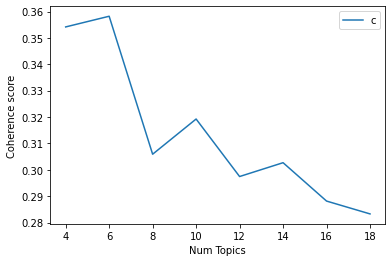

Num Topics = 4  has Coherence Value of 0.3542
Num Topics = 6  has Coherence Value of 0.3582
Num Topics = 8  has Coherence Value of 0.3059
Num Topics = 10  has Coherence Value of 0.3192
Num Topics = 12  has Coherence Value of 0.2974
Num Topics = 14  has Coherence Value of 0.3027
Num Topics = 16  has Coherence Value of 0.2881
Num Topics = 18  has Coherence Value of 0.2833


In [22]:
import matplotlib.pyplot as plt
# Show graph
limit=20; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [24]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary)

In [25]:

for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))
    print ('======================================================================================================================')
    #print out keywords only (without probability)
    #key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    #print ('Topic:',idx,key_words_only)

Topic: 0 Word: 0.012*"rid" + 0.012*"time" + 0.011*"park" + 0.011*"wait" + 0.011*"great" + 0.011*"line" + 0.009*"visit" + 0.009*"pretty" + 0.009*"walk" + 0.009*"ride"
Topic: 1 Word: 0.013*"ride" + 0.012*"mask" + 0.011*"like" + 0.011*"queue" + 0.011*"time" + 0.011*"park" + 0.011*"family" + 0.009*"great" + 0.009*"disney" + 0.009*"pass"
Topic: 2 Word: 0.012*"rid" + 0.012*"universal" + 0.012*"enjoy" + 0.012*"great" + 0.012*"world" + 0.011*"park" + 0.011*"visit" + 0.010*"ride" + 0.010*"love" + 0.010*"line"
Topic: 3 Word: 0.015*"ride" + 0.013*"pass" + 0.011*"park" + 0.011*"line" + 0.011*"wait" + 0.010*"amaze" + 0.010*"rid" + 0.010*"time" + 0.010*"universal" + 0.010*"queue"
Topic: 4 Word: 0.013*"ticket" + 0.013*"time" + 0.012*"park" + 0.010*"line" + 0.010*"ride" + 0.010*"purchase" + 0.010*"universal" + 0.009*"capacity" + 0.009*"rid" + 0.008*"water"
Topic: 5 Word: 0.013*"rid" + 0.012*"wait" + 0.011*"line" + 0.011*"ride" + 0.010*"go" + 0.010*"place" + 0.010*"pass" + 0.009*"love" + 0.009*"time" +

In [26]:
list_in_list=[]

doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf)
#print('document topics: ', doc_topics)

for each_doc in doc_topics:
    
    top_topic=sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    #print ("highest",top_topic)
    top_topic_num=top_topic[0]
    top_topic_prob=top_topic[1]
    #make a dataframe and fill out within each column.        
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])

print ("complete")  

complete


In [27]:
df = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df[:10])

   Dominant Topic  Probability
0               2     0.637975
1               5     0.672787
2               6     0.760601
3               4     0.800188
4               6     0.703965
5               1     0.849082
6               0     0.848467
7               6     0.775176
8               6     0.706791
9               6     0.820053


In [28]:
df_freq = pd.DataFrame(df['Dominant Topic'].value_counts())
df_freq.columns=['Frequency']
print (df_freq)

   Frequency
1        141
3        116
6         83
0         82
4         80
2         75
5         56


In [29]:
florida_reviews_postcovid_positive = florida_reviews_postcovid[florida_reviews_postcovid['label'] == 1.0]
florida_reviews_postcovid_negative = florida_reviews_postcovid[florida_reviews_postcovid['label'] == 0.0]

florida_reviews_postcovid_positive

rating        written_date  \
3         4        May 29, 2021   
4         5        May 28, 2021   
9         4        May 26, 2021   
11        5        May 25, 2021   
14        5        May 24, 2021   
15        5        May 22, 2021   
16        5        May 19, 2021   
18        4        May 19, 2021   
22        5        May 18, 2021   
24        5        May 17, 2021   
25        5        May 17, 2021   
27        5        May 16, 2021   
28        5        May 15, 2021   
31        4        May 12, 2021   
32        5        May 11, 2021   
38        5         May 7, 2021   
46        4         May 3, 2021   
48        5         May 1, 2021   
51        5      April 28, 2021   
54        5      April 26, 2021   
56        5      April 26, 2021   
58        5      April 25, 2021   
60        4      April 24, 2021   
62        5      April 24, 2021   
64        5      April 22, 2021   
66        5      April 20, 2021   
67        5      April 18, 2021   
74        4      April 14, 2021   
77        4      April 12, 2021   
83        5       April 9, 2021   
85        5       April 9, 2021   
86        4       April 9, 2021   
92        5       April 7, 2021   
94        4       April 6, 2021   
95        4       April 6, 2021   
96        5       April 6, 2021   
97        5       April 6, 2021   
99        4       April 5, 2021   
103       5       April 4, 2021   
104       5       April 4, 2021   
106       5       April 3, 2021   
107       5       April 3, 2021   
109       4       April 3, 2021   
112       5       April 2, 2021   
113       4       April 1, 2021   
114       4       April 1, 2021   
115       5       April 1, 2021   
119       5      March 30, 2021   
121       5      March 30, 2021   
127       5      March 29, 2021   
129       5      March 27, 2021   
131       4      March 26, 2021   
133       4      March 24, 2021   
135       4      March 23, 2021   
136       4      March 23, 2021   
142       5      March 21, 2021   
143       4      March 21, 2021   
144       4      March 21, 2021   
145       5      March 20, 2021   
147       5      March 19, 2021   
160       4      March 14, 2021   
161       5      March 13, 2021   
163       5      March 10, 2021   
164       5       March 9, 2021   
165       5       March 9, 2021   
168       5       March 7, 2021   
169       5       March 3, 2021   
170       5       March 2, 2021   
171       4       March 2, 2021   
172       4       March 1, 2021   
174       5   February 28, 2021   
175       5   February 27, 2021   
176       4   February 23, 2021   
178       5   February 21, 2021   
179       5   February 21, 2021   
181       4   February 19, 2021   
183       5   February 18, 2021   
185       5   February 17, 2021   
188       5   February 16, 2021   
192       5   February 10, 2021   
194       5   February 10, 2021   
198       5    February 6, 2021   
201       5    February 2, 2021   
202       5    January 30, 2021   
203       5    January 30, 2021   
206       4    January 28, 2021   
207       4    January 28, 2021   
210       5    January 23, 2021   
211       5    January 23, 2021   
212       5    January 21, 2021   
213       5    January 21, 2021   
214       4    January 20, 2021   
216       5    January 18, 2021   
217       5    January 17, 2021   
218       5    January 16, 2021   
220       5    January 16, 2021   
221       5    January 16, 2021   
223       4    January 13, 2021   
225       4    January 12, 2021   
226       5    January 12, 2021   
230       5     January 9, 2021   
231       4     January 9, 2021   
234       5     January 7, 2021   
235       5     January 6, 2021   
236       5     January 6, 2021   
237       5     January 4, 2021   
238       5     January 4, 2021   
241       4     January 3, 2021   
244       5     January 3, 2021   
247       5     January 2, 2021   
248       4     January 2, 2021   
251       4     January 1, 2021   
252       4     January 1, 2021   
254       5   D

In [30]:
def lemmatize_text(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
  
        #Remove stop words and words fewer than 2 characters.#Remove some adjectvies (e.g. amaze, )
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

florida_reviews_postcovid_positive['processed_text']=florida_reviews_postcovid_positive['review_text'].map(preprocess)
print (florida_reviews_postcovid_positive.iloc[:10,:])

    rating  written_date                                        review_text  \
3        4  May 29, 2021  When a person tries the test seat for the ride...   
4        5  May 28, 2021  Ok, I can't stress enough to anyone and everyo...   
9        4  May 26, 2021  We spent 6 nights on site at Sapphire Falls as...   
11       5  May 25, 2021  Universal Adventure Park was the best out of t...   
14       5  May 24, 2021  For all ages rides and restaurants lots of pho...   
15       5  May 22, 2021  The park is always awesome. It vets pretty cro...   
16       5  May 19, 2021  It was humid, it was windy, we had to wear mas...   
18       4  May 19, 2021  Went to is it Park on a Wednesday got there ea...   
22       5  May 18, 2021  Great price. Great experience. It was super ea...   
24       5  May 17, 2021  This has been a long time coming. I've literal...   

                       branch  label  \
3   Universal Studios Florida    1.0   
4   Universal Studios Florida    1.0   
9   Univer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [31]:
dictionary = gensim.corpora.Dictionary(florida_reviews_postcovid_positive['processed_text'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(florida_reviews_postcovid_positive))
print (len(dictionary))

0 actual
1 away
2 express
3 get
4 give
5 green
6 group
7 light
8 line
9 long
10 operators
11 pass
12 person
13 rectify
14 rid
15 ride
16 seat
17 situation
18 test
19 try
20 turn
316
2768


In [32]:
dictionary.filter_extremes(no_below=20, no_above=0.95)
print (len(dictionary))
print (dictionary)

143
Dictionary(143 unique tokens: ['express', 'get', 'give', 'line', 'long']...)


In [33]:
bow_corpus = [dictionary.doc2bow(doc) for doc in florida_reviews_postcovid_positive['processed_text']]
print (len(bow_corpus))
print (bow_corpus[0])
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

316
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]
Word 0 ("express") appears 1 time.
Word 1 ("get") appears 1 time.
Word 2 ("give") appears 1 time.
Word 3 ("line") appears 1 time.
Word 4 ("long") appears 1 time.
Word 5 ("pass") appears 1 time.
Word 6 ("rid") appears 1 time.
Word 7 ("ride") appears 1 time.
Word 8 ("try") appears 1 time.


In [34]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.3239670262538789), (1, 0.3871476016103597), (2, 0.42552990939183566), (3, 0.2194397559194929), (4, 0.33714528364509594), (5, 0.2352044203538204), (6, 0.13925076785598428), (7, 0.14180999217514145), (8, 0.5544760394599847)]


In [35]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary) 

In [36]:
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))
    print ('======================================================================================================================')
    #print out keywords only (without probability)
    #key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    #print ('Topic:',idx,key_words_only)

Topic: 0 Word: 0.020*"universal" + 0.020*"disney" + 0.019*"year" + 0.018*"staff" + 0.017*"good" + 0.017*"orlando" + 0.017*"best" + 0.017*"park" + 0.016*"time" + 0.015*"place"
Topic: 1 Word: 0.018*"line" + 0.017*"wait" + 0.017*"minutes" + 0.016*"express" + 0.015*"pass" + 0.015*"time" + 0.015*"help" + 0.014*"people" + 0.014*"park" + 0.014*"recommend"
Topic: 2 Word: 0.020*"ride" + 0.017*"time" + 0.017*"experience" + 0.016*"great" + 0.016*"family" + 0.016*"line" + 0.016*"park" + 0.016*"pass" + 0.015*"covid" + 0.014*"amaze"
Topic: 3 Word: 0.037*"attractions" + 0.021*"lot" + 0.019*"long" + 0.019*"enjoy" + 0.018*"rid" + 0.016*"want" + 0.015*"potter" + 0.015*"universal" + 0.015*"go" + 0.015*"harry"
Topic: 4 Word: 0.018*"place" + 0.018*"time" + 0.018*"enjoy" + 0.016*"ride" + 0.016*"rid" + 0.016*"crowd" + 0.015*"clean" + 0.014*"felt" + 0.014*"fast" + 0.014*"universal"
Topic: 5 Word: 0.020*"family" + 0.020*"great" + 0.018*"time" + 0.017*"ride" + 0.017*"walk" + 0.017*"amaze" + 0.016*"world" + 0.01

In [38]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=florida_reviews_postcovid_positive['processed_text'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=florida_reviews_postcovid_positive['processed_text'], start=4, limit=20, step=2)

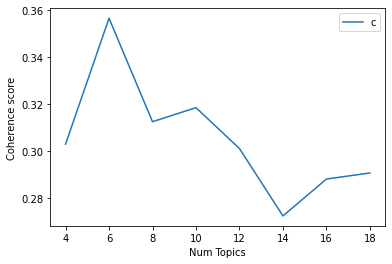

Num Topics = 4  has Coherence Value of 0.3029
Num Topics = 6  has Coherence Value of 0.3566
Num Topics = 8  has Coherence Value of 0.3125
Num Topics = 10  has Coherence Value of 0.3184
Num Topics = 12  has Coherence Value of 0.301
Num Topics = 14  has Coherence Value of 0.2722
Num Topics = 16  has Coherence Value of 0.288
Num Topics = 18  has Coherence Value of 0.2906


In [39]:
import matplotlib.pyplot as plt
# Show graph
limit=20; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [40]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary)

In [41]:
#top 10 keywords along with probability for each keyword.

for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))
    print ('======================================================================================================================')
    #print out keywords only (without probability)
    #key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    #print ('Topic:',idx,key_words_only)

Topic: 0 Word: 0.024*"ride" + 0.020*"line" + 0.016*"visit" + 0.015*"pass" + 0.015*"fast" + 0.015*"enjoy" + 0.015*"early" + 0.015*"time" + 0.014*"like" + 0.014*"park"
Topic: 1 Word: 0.023*"family" + 0.021*"time" + 0.018*"universal" + 0.017*"experience" + 0.016*"pass" + 0.015*"park" + 0.014*"disney" + 0.014*"great" + 0.014*"staff" + 0.013*"go"
Topic: 2 Word: 0.018*"kid" + 0.018*"crowd" + 0.017*"time" + 0.016*"place" + 0.015*"pass" + 0.014*"mask" + 0.014*"enjoy" + 0.014*"wait" + 0.014*"express" + 0.014*"park"
Topic: 3 Word: 0.021*"ride" + 0.018*"sure" + 0.017*"line" + 0.016*"park" + 0.016*"harry" + 0.016*"amaze" + 0.015*"potter" + 0.014*"hogwarts" + 0.014*"express" + 0.014*"visit"
Topic: 4 Word: 0.018*"great" + 0.017*"year" + 0.016*"good" + 0.016*"park" + 0.016*"food" + 0.015*"clean" + 0.015*"rid" + 0.015*"mask" + 0.014*"place" + 0.014*"time"
Topic: 5 Word: 0.024*"great" + 0.020*"come" + 0.019*"ride" + 0.017*"family" + 0.016*"time" + 0.016*"days" + 0.016*"rid" + 0.016*"park" + 0.015*"harr

In [42]:
list_in_list=[]

doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf)
#print('document topics: ', doc_topics)

for each_doc in doc_topics:
    
    top_topic=sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    #print ("highest",top_topic)
    top_topic_num=top_topic[0]
    top_topic_prob=top_topic[1]
    #make a dataframe and fill out within each column.        
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])

print ("complete") 

complete


In [43]:
df = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df[:10])

   Dominant Topic  Probability
0               6     0.771274
1               1     0.817867
2               2     0.897433
3               2     0.788482
4               6     0.699709
5               2     0.786521
6               2     0.870318
7               0     0.782609
8               6     0.770426
9               4     0.818044


In [44]:
df_freq = pd.DataFrame(df['Dominant Topic'].value_counts())
df_freq.columns=['Frequency']
print (df_freq)

   Frequency
2         70
5         62
4         53
1         45
3         30
6         29
0         27


In [45]:
florida_reviews_postcovid_negative

rating        written_date  \
0         2        May 30, 2021   
1         1        May 30, 2021   
2         2        May 30, 2021   
5         1        May 28, 2021   
6         2        May 27, 2021   
7         2        May 27, 2021   
8         1        May 27, 2021   
10        1        May 26, 2021   
12        2        May 25, 2021   
13        1        May 24, 2021   
17        1        May 19, 2021   
19        1        May 19, 2021   
20        2        May 19, 2021   
21        2        May 18, 2021   
23        2        May 18, 2021   
26        1        May 16, 2021   
30        2        May 13, 2021   
33        2        May 11, 2021   
34        1        May 10, 2021   
35        1        May 10, 2021   
36        2         May 8, 2021   
37        1         May 8, 2021   
40        1         May 6, 2021   
42        1         May 6, 2021   
44        1         May 4, 2021   
45        1         May 4, 2021   
47        2         May 1, 2021   
49        2      April 30, 2021   
50        1      April 29, 2021   
52        1      April 28, 2021   
53        1      April 26, 2021   
55        1      April 26, 2021   
57        1      April 26, 2021   
59        1      April 24, 2021   
63        1      April 22, 2021   
65        1      April 22, 2021   
68        1      April 18, 2021   
69        1      April 17, 2021   
71        1      April 17, 2021   
72        2      April 16, 2021   
73        1      April 15, 2021   
75        2      April 12, 2021   
76        1      April 12, 2021   
79        2      April 11, 2021   
80        1      April 10, 2021   
81        1      April 10, 2021   
82        2      April 10, 2021   
87        1       April 8, 2021   
88        1       April 8, 2021   
89        1       April 8, 2021   
90        2       April 8, 2021   
91        1       April 7, 2021   
93        1       April 7, 2021   
98        2       April 5, 2021   
100       1       April 5, 2021   
102       1       April 4, 2021   
108       1       April 3, 2021   
110       1       April 3, 2021   
111       1       April 2, 2021   
116       1      March 31, 2021   
117       1      March 31, 2021   
118       1      March 31, 2021   
120       1      March 30, 2021   
122       1      March 29, 2021   
123       1      March 29, 2021   
124       1      March 29, 2021   
125       1      March 29, 2021   
128       1      March 28, 2021   
130       1      March 26, 2021   
134       2      March 23, 2021   
137       1      March 23, 2021   
138       1      March 22, 2021   
139       1      March 22, 2021   
140       1      March 22, 2021   
141       1      March 21, 2021   
146       1      March 20, 2021   
148       2      March 19, 2021   
149       1      March 19, 2021   
150       2      March 18, 2021   
151       1      March 18, 2021   
152       2      March 18, 2021   
153       1      March 17, 2021   
154       1      March 17, 2021   
155       2      March 17, 2021   
156       1      March 17, 2021   
158       1      March 15, 2021   
159       1      March 15, 2021   
162       1      March 11, 2021   
166       1       March 9, 2021   
167       1       March 8, 2021   
177       1   February 22, 2021   
182       1   February 18, 2021   
184       2   February 18, 2021   
186       1   February 17, 2021   
187       1   February 17, 2021   
189       1   February 16, 2021   
190       1   February 13, 2021   
195       2    February 8, 2021   
196       1    February 7, 2021   
197       1    February 7, 2021   
200       2    February 3, 2021   
204       1    January 30, 2021   
205       1    January 29, 2021   
208       1    January 27, 2021   
209       2    January 25, 2021   
215       2    January 19, 2021   
219       1    January 16, 2021   
222       1    January 14, 2021   
224       2    January 13, 2021   
227       2    January 11, 2021   
239       1     January 4, 2021   
243       2     January 3, 2021   
249       2     January 2, 2021   
250       2    

In [46]:
def lemmatize_text(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
  
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

florida_reviews_postcovid_negative['processed_text']=florida_reviews_postcovid_negative['review_text'].map(preprocess)
print (florida_reviews_postcovid_negative.iloc[:10,:]) 

    rating  written_date                                        review_text  \
0        2  May 30, 2021  We went to Universal over Memorial Day weekend...   
1        1  May 30, 2021  The food service is horrible. I’m not reviewin...   
2        2  May 30, 2021  I booked this vacation mainly to ride Hagrid m...   
5        1  May 28, 2021  Worst experience I have ever had the rides are...   
6        2  May 27, 2021  I just expected more. Alot of waiting around, ...   
7        2  May 27, 2021  This was my 4th trip with my daughter to Unive...   
8        1  May 27, 2021  Universal is one thing - Not Disney. Everythin...   
10       1  May 26, 2021  I'm literally standing in a line for the Hagri...   
12       2  May 25, 2021  It’s no Disney, I’ll tell you that much. We ju...   
13       1  May 24, 2021  We went to City Walk due to being with our qua...   

                       branch  label  \
0   Universal Studios Florida    0.0   
1   Universal Studios Florida    0.0   
2   Univer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [47]:
dictionary = gensim.corpora.Dictionary(florida_reviews_postcovid_negative['processed_text'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(florida_reviews_postcovid_negative))
print (len(dictionary)) 

0 age
1 apologize
2 avoid
3 away
4 back
5 beer
6 butter
7 check
8 clearly
9 code
10 complete
11 convince
12 disaster
13 disney
14 enter
15 express
16 extra
17 felt
18 forever
19 go
20 guest
184
2270


In [48]:
dictionary.filter_extremes(no_below=20, no_above=0.75)
print (len(dictionary))
print (dictionary)

81
Dictionary(81 unique tokens: ['away', 'check', 'disney', 'express', 'go']...)


In [49]:
bow_corpus = [dictionary.doc2bow(doc) for doc in florida_reviews_postcovid_negative['processed_text']]
print (len(bow_corpus))
print (bow_corpus[0])
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

184
[(0, 1), (1, 1), (2, 1), (3, 6), (4, 1), (5, 4), (6, 1), (7, 2), (8, 1), (9, 1), (10, 5), (11, 2), (12, 1), (13, 4), (14, 4), (15, 3), (16, 2), (17, 1), (18, 2), (19, 4), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 2)]
Word 0 ("away") appears 1 time.
Word 1 ("check") appears 1 time.
Word 2 ("disney") appears 1 time.
Word 3 ("express") appears 6 time.
Word 4 ("go") appears 1 time.
Word 5 ("guest") appears 4 time.
Word 6 ("hour") appears 1 time.
Word 7 ("hours") appears 2 time.
Word 8 ("leave") appears 1 time.
Word 9 ("like") appears 1 time.
Word 10 ("line") appears 5 time.
Word 11 ("long") appears 2 time.
Word 12 ("minutes") appears 1 time.
Word 13 ("park") appears 4 time.
Word 14 ("pass") appears 4 time.
Word 15 ("pay") appears 3 time.
Word 16 ("people") appears 2 time.
Word 17 ("place") appears 1 time.
Word 18 ("rid") appears 2 time.
Word 19 ("service") appears 4 time.
Word 20 ("spend") appears 1 time.
Word 21 ("take") appears 2 time.
Word 22 ("tic

In [50]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.1091963012623053), (1, 0.11158804741632744), (2, 0.06908579820075676), (3, 0.5493863397479549), (4, 0.051178211862558644), (5, 0.45638603732539695), (6, 0.06908579820075676), (7, 0.1360513864147898), (8, 0.08681517545016464), (9, 0.0680256932073949), (10, 0.16458024919352823), (11, 0.1360513864147898), (12, 0.08387647445004796), (13, 0.06830434699511402), (14, 0.241001657727208), (15, 0.26505004177197156), (16, 0.07701992143707502), (17, 0.08387647445004796), (18, 0.07701992143707502), (19, 0.31904486823062256), (20, 0.0810967017701168), (21, 0.18998642328891663), (22, 0.049687867784101926), (23, 0.03135004236080894), (24, 0.08246780357485113), (25, 0.030331924524243842), (26, 0.07820868081893413), (27, 0.09325022199303447), (28, 0.2183926025246106)]


In [52]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=4, id2word=dictionary)

In [53]:
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))
    print ('======================================================================================================================')
    #print out keywords only (without probability)
    #key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    #print ('Topic:',idx,key_words_only)

Topic: 0 Word: 0.031*"pass" + 0.025*"rid" + 0.023*"express" + 0.022*"rude" + 0.021*"ticket" + 0.021*"purchase" + 0.020*"ride" + 0.019*"say" + 0.019*"wait" + 0.018*"close"
Topic: 1 Word: 0.034*"ride" + 0.028*"service" + 0.024*"line" + 0.023*"time" + 0.023*"customer" + 0.022*"minutes" + 0.022*"mask" + 0.021*"wait" + 0.020*"hours" + 0.019*"think"
Topic: 2 Word: 0.028*"rid" + 0.026*"distance" + 0.026*"covid" + 0.026*"social" + 0.025*"mask" + 0.025*"experience" + 0.023*"people" + 0.023*"park" + 0.023*"food" + 0.022*"disney"
Topic: 3 Word: 0.036*"mask" + 0.032*"wear" + 0.029*"pay" + 0.028*"crowd" + 0.028*"price" + 0.024*"line" + 0.024*"work" + 0.024*"staff" + 0.023*"stand" + 0.022*"try"


In [54]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=florida_reviews_postcovid_negative['processed_text'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=florida_reviews_postcovid_negative['processed_text'], start=4, limit=20, step=2)

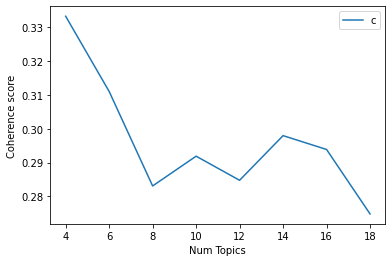

Num Topics = 4  has Coherence Value of 0.3332
Num Topics = 6  has Coherence Value of 0.311
Num Topics = 8  has Coherence Value of 0.2831
Num Topics = 10  has Coherence Value of 0.2919
Num Topics = 12  has Coherence Value of 0.2847
Num Topics = 14  has Coherence Value of 0.2979
Num Topics = 16  has Coherence Value of 0.2939
Num Topics = 18  has Coherence Value of 0.2748


In [55]:
import matplotlib.pyplot as plt
# Show graph
limit=20; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [56]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=4, id2word=dictionary)

In [57]:
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))
    print ('======================================================================================================================')
    #print out keywords only (without probability)
    #key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    #print ('Topic:',idx,key_words_only)

Topic: 0 Word: 0.029*"ride" + 0.029*"mask" + 0.025*"rude" + 0.021*"line" + 0.021*"experience" + 0.020*"long" + 0.020*"people" + 0.020*"staff" + 0.019*"employees" + 0.019*"potter"
Topic: 1 Word: 0.028*"rid" + 0.026*"line" + 0.025*"wait" + 0.025*"pass" + 0.024*"guest" + 0.024*"ticket" + 0.023*"service" + 0.021*"universal" + 0.020*"time" + 0.020*"money"
Topic: 2 Word: 0.027*"ride" + 0.024*"rid" + 0.023*"virtual" + 0.023*"pass" + 0.022*"mask" + 0.022*"disney" + 0.021*"universal" + 0.021*"like" + 0.020*"line" + 0.020*"wait"
Topic: 3 Word: 0.026*"purchase" + 0.025*"stay" + 0.024*"park" + 0.023*"ticket" + 0.022*"sure" + 0.021*"disappoint" + 0.021*"customer" + 0.020*"pass" + 0.020*"universal" + 0.019*"crowd"


In [58]:
list_in_list=[]

doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf)
#print('document topics: ', doc_topics)

for each_doc in doc_topics:
    
    top_topic=sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    #print ("highest",top_topic)
    top_topic_num=top_topic[0]
    top_topic_prob=top_topic[1]
    #make a dataframe and fill out within each column.        
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])

print ("complete")  

complete


In [59]:
df = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df[:10])

   Dominant Topic  Probability
0               1     0.839553
1               0     0.785884
2               2     0.668508
3               0     0.792810
4               0     0.827675
5               2     0.693754
6               0     0.861254
7               1     0.723805
8               0     0.870541
9               1     0.829581


In [60]:
df_freq = pd.DataFrame(df['Dominant Topic'].value_counts())
df_freq.columns=['Frequency']
print (df_freq)

   Frequency
0         80
1         39
2         39
3         26


In [61]:
singapore_reviews_postcovid_positive = singapore_reviews_postcovid[singapore_reviews_postcovid['label'] == 1.0]
singapore_reviews_postcovid_negative = singapore_reviews_postcovid[singapore_reviews_postcovid['label'] == 0.0] 

singapore_reviews_postcovid_positive

rating        written_date  \
35150       5        May 26, 2021   
35151       4        May 23, 2021   
35152       5        May 18, 2021   
35153       4        May 13, 2021   
35154       5         May 8, 2021   
35155       5      April 25, 2021   
35156       5      April 25, 2021   
35157       4      April 25, 2021   
35160       5       April 5, 2021   
35161       5       April 4, 2021   
35163       5      March 15, 2021   
35164       5      March 12, 2021   
35165       4   February 28, 2021   
35167       4   February 24, 2021   
35168       5   February 19, 2021   
35170       5   February 13, 2021   
35171       5    February 4, 2021   
35173       5    January 28, 2021   
35176       4     January 5, 2021   
35180       5   December 26, 2020   
35181       5   December 25, 2020   
35182       4   December 22, 2020   
35193       4   November 28, 2020   
35196       5   November 18, 2020   
35197       5   November 17, 2020   
35200       5    November 4, 2020   
35202       5  September 24, 2020   
35203       4  September 20, 2020   
35204       4  September 14, 2020   
35205       4  September 12, 2020   
35206       5   September 9, 2020   
35207       4   September 6, 2020   
35209       5   September 4, 2020   
35211       5     August 26, 2020   
35212       5     August 20, 2020   
35213       5     August 20, 2020   
35214       5     August 19, 2020   
35215       5     August 16, 2020   
35216       5     August 14, 2020   
35217       5      August 5, 2020   
35218       5      August 3, 2020   
35219       5      August 1, 2020   
35224       5       July 21, 2020   
35225       5       July 18, 2020   
35227       5       July 17, 2020   
35228       4       July 14, 2020   
35230       5       July 11, 2020   
35232       4       June 21, 2020   
35233       5       June 14, 2020   
35234       5       June 13, 2020   
35235       5        May 22, 2020   
35237       5        May 13, 2020   
35238       5        May 12, 2020   
35239       5        May 10, 2020   
35240       5         May 7, 2020   
35243       5      April 29, 2020   
35244       4      April 28, 2020   
35245       5      April 27, 2020   
35246       5      April 27, 2020   
35247       5      April 26, 2020   
35248       5      April 26, 2020   
35249       5      April 23, 2020   
35250       5      April 17, 2020   
35251       5      April 12, 2020   
35252       5      April 12, 2020   
35253       5      April 10, 2020   
35254       4       April 1, 2020   
35255       5       April 1, 2020   
35258       5      March 27, 2020   
35259       5      March 25, 2020   
35260       4      March 24, 2020   
35261       5      March 23, 2020   
35262       4      March 22, 2020   
35263       5      March 21, 2020   
35265       4      March 19, 2020   
35266       4      March 16, 2020   
35267       5      March 15, 2020   
35268       5      March 14, 2020   
35270       4      March 12, 2020   
35271       5      March 10, 2020   
35272       4      March 10, 2020   
35273       5      March 10, 2020   

                                             review_text  \
35150  This place is just awesome. All the rides were...   
35151  Excellent place when you plan on going vacatio...   
35152  Universal Studios Singapore opened in 2010. It...   
35153  Overall experience is good but queue still pre...   
35154  Good place for family experience,& easy acces ...   
35155  Everywhere was very clean, safe distancing mea...   
35156  Great place for young and older families Great...   
35157  Hi,I just want to say that i did enjot my time...   
35160  It was a nice day spent in Universal Studios. ...   
35161  I love this place lol.At first,i think it was ...   
35163  Walking around sentosa is very interesting and...   
35164  Definitely would recommend to anyone any age. ...   
35165  Glad I bought the S.E.A Aquarium package and U...   
35167  The place was not crowded due to crowd control...   
35168  Singapore is known as a famo

In [62]:
def lemmatize_text(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
  
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

singapore_reviews_postcovid_positive['processed_text']=singapore_reviews_postcovid_positive['review_text'].map(preprocess)
print (singapore_reviews_postcovid_positive.iloc[:10,:]) 

       rating    written_date  \
35150       5    May 26, 2021   
35151       4    May 23, 2021   
35152       5    May 18, 2021   
35153       4    May 13, 2021   
35154       5     May 8, 2021   
35155       5  April 25, 2021   
35156       5  April 25, 2021   
35157       4  April 25, 2021   
35160       5   April 5, 2021   
35161       5   April 4, 2021   

                                             review_text  \
35150  This place is just awesome. All the rides were...   
35151  Excellent place when you plan on going vacatio...   
35152  Universal Studios Singapore opened in 2010. It...   
35153  Overall experience is good but queue still pre...   
35154  Good place for family experience,& easy acces ...   
35155  Everywhere was very clean, safe distancing mea...   
35156  Great place for young and older families Great...   
35157  Hi,I just want to say that i did enjot my time...   
35160  It was a nice day spent in Universal Studios. ...   
35161  I love this place lol.At firs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [63]:
dictionary = gensim.corpora.Dictionary(singapore_reviews_postcovid_positive['processed_text'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(singapore_reviews_postcovid_positive))
print (len(dictionary)) 

0 adventure
1 awesome
2 fantastic
3 fill
4 intrigue
5 place
6 rid
7 show
8 small
9 thrill
10 activities
11 excellent
12 excite
13 family
14 friends
15 go
16 plan
17 spontaneous
18 trip
19 vacation
20 want
82
997


In [64]:
dictionary.filter_extremes(no_below=10, no_above=0.90)
print (len(dictionary))
print (dictionary)

39
Dictionary(39 unique tokens: ['place', 'rid', 'show', 'family', 'friends']...)


In [65]:
bow_corpus = [dictionary.doc2bow(doc) for doc in florida_reviews_postcovid_positive['processed_text']]
print (len(bow_corpus))
print (bow_corpus[0])
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

316
[(1, 1), (19, 1), (29, 1), (36, 1)]
Word 1 ("rid") appears 1 time.
Word 19 ("long") appears 1 time.
Word 29 ("ride") appears 1 time.
Word 36 ("pass") appears 1 time.


In [66]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(1, 0.3049692960475039), (19, 0.7383726596417638), (29, 0.3105741831950435), (36, 0.5151147645860771)]


In [68]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=4, id2word=dictionary)

In [69]:
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))
    print ('======================================================================================================================')
    #print out keywords only (without probability)
    #key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    #print ('Topic:',idx,key_words_onl

Topic: 0 Word: 0.060*"rid" + 0.055*"pass" + 0.052*"park" + 0.050*"great" + 0.046*"love" + 0.046*"universal" + 0.043*"ride" + 0.041*"experience" + 0.041*"people" + 0.041*"time"
Topic: 1 Word: 0.055*"time" + 0.052*"great" + 0.049*"staff" + 0.046*"park" + 0.043*"place" + 0.042*"family" + 0.042*"best" + 0.042*"experience" + 0.041*"go" + 0.038*"good"
Topic: 2 Word: 0.063*"good" + 0.053*"food" + 0.049*"kid" + 0.048*"ride" + 0.045*"covid" + 0.044*"want" + 0.040*"park" + 0.038*"open" + 0.036*"people" + 0.032*"time"
Topic: 3 Word: 0.078*"ride" + 0.059*"visit" + 0.051*"wait" + 0.049*"enjoy" + 0.045*"time" + 0.044*"worth" + 0.041*"park" + 0.041*"universal" + 0.035*"rid" + 0.033*"covid"


In [70]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=singapore_reviews_postcovid_positive['processed_text'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=singapore_reviews_postcovid_positive['processed_text'], start=4, limit=20, step=2)

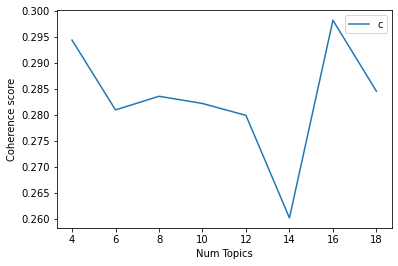

Num Topics = 4  has Coherence Value of 0.2943
Num Topics = 6  has Coherence Value of 0.2809
Num Topics = 8  has Coherence Value of 0.2835
Num Topics = 10  has Coherence Value of 0.2821
Num Topics = 12  has Coherence Value of 0.2798
Num Topics = 14  has Coherence Value of 0.2601
Num Topics = 16  has Coherence Value of 0.2981
Num Topics = 18  has Coherence Value of 0.2845


In [71]:
import matplotlib.pyplot as plt
# Show graph
limit=20; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [72]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary)

In [73]:
#top 10 keywords along with probability for each keyword.

for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))
    print ('======================================================================================================================')
    #print out keywords only (without probability)
    #key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    #print ('Topic:',idx,key_words_only)

Topic: 0 Word: 0.084*"go" + 0.056*"pass" + 0.051*"time" + 0.049*"covid" + 0.045*"park" + 0.045*"rid" + 0.044*"universal" + 0.042*"ride" + 0.041*"close" + 0.038*"wait"
Topic: 1 Word: 0.060*"universal" + 0.055*"experience" + 0.050*"come" + 0.048*"studios" + 0.047*"enjoy" + 0.044*"family" + 0.043*"rid" + 0.042*"park" + 0.041*"time" + 0.038*"long"
Topic: 2 Word: 0.053*"ride" + 0.052*"park" + 0.048*"covid" + 0.047*"pass" + 0.047*"rid" + 0.045*"place" + 0.042*"wait" + 0.042*"want" + 0.042*"open" + 0.040*"staff"
Topic: 3 Word: 0.076*"great" + 0.061*"time" + 0.055*"best" + 0.054*"visit" + 0.051*"ride" + 0.051*"park" + 0.041*"wait" + 0.035*"rid" + 0.034*"universal" + 0.034*"go"
Topic: 4 Word: 0.065*"good" + 0.053*"ride" + 0.052*"crowd" + 0.046*"love" + 0.044*"great" + 0.044*"staff" + 0.040*"people" + 0.039*"wait" + 0.037*"place" + 0.036*"park"


In [74]:
list_in_list=[]

doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf)
#print('document topics: ', doc_topics)

for each_doc in doc_topics:
    
    top_topic=sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    #print ("highest",top_topic)
    top_topic_num=top_topic[0]
    top_topic_prob=top_topic[1]
    #make a dataframe and fill out within each column.        
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])

print ("complete")  

complete


In [75]:
df = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df[:10])

   Dominant Topic  Probability
0               0     0.714241
1               0     0.748623
2               1     0.848038
3               3     0.776982
4               3     0.644770
5               4     0.745239
6               2     0.819456
7               0     0.789305
8               3     0.728688
9               1     0.786303


In [76]:
f_freq = pd.DataFrame(df['Dominant Topic'].value_counts())
df_freq.columns=['Frequency']
print (df_freq)

   Frequency
0         80
1         39
2         39
3         26


In [77]:
singapore_reviews_postcovid_negative

rating        written_date  \
35158       2      April 12, 2021   
35159       1       April 9, 2021   
35162       1      March 19, 2021   
35172       1    January 29, 2021   
35175       1     January 7, 2021   
35177       1     January 2, 2021   
35178       1   December 30, 2020   
35179       1   December 27, 2020   
35183       1   December 21, 2020   
35184       1   December 20, 2020   
35185       1   December 20, 2020   
35186       1   December 17, 2020   
35187       1   December 14, 2020   
35188       1   December 12, 2020   
35189       2   December 12, 2020   
35190       1   December 11, 2020   
35191       1    December 7, 2020   
35194       2   November 27, 2020   
35198       2   November 10, 2020   
35201       1  September 27, 2020   
35208       2   September 5, 2020   
35220       1       July 30, 2020   
35221       1       July 30, 2020   
35222       1       July 27, 2020   
35223       1       July 23, 2020   
35229       1       July 14, 2020   
35231       1        July 5, 2020   
35241       1         May 7, 2020   
35242       1         May 7, 2020   
35256       1      March 30, 2020   
35264       1      March 20, 2020   

                                             review_text  \
35158  Many attractions closed, but still full price....   
35159  On a non-holiday Friday, rides start @ 2pm and...   
35162  Terrible. Did not enjoy a single moment.  Don'...   
35172  Food is terrible. I tried the Pizza place - Lo...   
35175  The place is so ran down even indoor ride queu...   
35177  Not enough shelters from rain. Even shelters h...   
35178  My 2 daughters (7 and 4) and I visited on 28th...   
35179  We booked our tickets beforehand but theres st...   
35183  It was supposed to be a place of fun. However,...   
35184  They have booking system yet still cannot mana...   
35185  I am having a terrible time with ticket bookin...   
35186  Usually a great place for kids, but during Civ...   
35187  My wife and I are senior citizens.  On 10 Dece...   
35188  I visited the park on 10 December and it was a...   
35189  Really disappointing experience. I have visit ...   
35190  I would like to complaint about the experience...   
35191  Horrible experience. Crowded even though there...   
35194  Most restaurants, food courts, drink stands ar...   
35198  I love to go to theme parks, but universal stu...   
35201  When it takes over an hour and half just to en...   
35208  Well a lot of the restaurants are closed insid...   
35220  Stopped here during our visit to Singapore. It...   
35221  Think twice before coming - 2 hour queues to g...   
35222  Very disappointing visit during the recent Sin...   
35223  Because some our friends went the very first d...   
35229  3 rides in 5 hours tells you everything. Obvio...   
35231  Very inefficient and slow process! The interna...   
35241  Me and my family waited for over an hour to ju...   
35242  Me and my family waited for over an hour to ju...   
35256  Universal Studio Singapore advertised on all m...   
35264  Park fare is overpriced for the small park. St...   

                            branch  label  
35158  Universal Studios Singapore    0.0  
35159  Universal Studios Singapore    0.0  
35162  Universal Studios Singapore    0.0  
35172  Universal Studios Singapore    0.0  
35175  Universal Studios Singapore    0.0  
35177  Universal Studios Singapore    0.0  
35178  Universal Studios Singapore    0.0  
35179  Universal Studios Singapore    0.0  
35183  Universal Studios Singapore    0.0  
35184  Universal Studios Singapore    0.0  
35185  Universal Studios Singapore    0.0  
35186  Universal Studios Singapore    0.0  
35187  Universal Studios Singapore    0.0  
35188  Universal Studios Singapore    0.0  
35189  Universal Studios Singapore    0.0  
35190  Universal Studios Singapore    0.0  
35191  Universal Studios Singapore    0.0  
35194  Universal Studios Singapore    0.0  
35198  Universal Studios Singapore    0.0  
35201  Universal Stud

In [78]:
def lemmatize_text(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
  
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

singapore_reviews_postcovid_negative['processed_text']=singapore_reviews_postcovid_negative['review_text'].map(preprocess)
print (singapore_reviews_postcovid_negative.iloc[:10,:]) 

       rating       written_date  \
35158       2     April 12, 2021   
35159       1      April 9, 2021   
35162       1     March 19, 2021   
35172       1   January 29, 2021   
35175       1    January 7, 2021   
35177       1    January 2, 2021   
35178       1  December 30, 2020   
35179       1  December 27, 2020   
35183       1  December 21, 2020   
35184       1  December 20, 2020   

                                             review_text  \
35158  Many attractions closed, but still full price....   
35159  On a non-holiday Friday, rides start @ 2pm and...   
35162  Terrible. Did not enjoy a single moment.  Don'...   
35172  Food is terrible. I tried the Pizza place - Lo...   
35175  The place is so ran down even indoor ride queu...   
35177  Not enough shelters from rain. Even shelters h...   
35178  My 2 daughters (7 and 4) and I visited on 28th...   
35179  We booked our tickets beforehand but theres st...   
35183  It was supposed to be a place of fun. However,...   
351

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [79]:
dictionary = gensim.corpora.Dictionary(singapore_reviews_postcovid_negative['processed_text'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(singapore_reviews_postcovid_negative))
print (len(dictionary)) 

0 attractions
1 book
2 close
3 correct
4 covid
5 different
6 dont
7 double
8 end
9 estimate
10 function
11 hour
12 information
13 last
14 leave
15 maybe
16 minutes
17 price
18 rid
19 seat
20 second
31
627


In [80]:
dictionary.filter_extremes(no_below=5, no_above=0.90)
print (len(dictionary))
print (dictionary)

43
Dictionary(43 unique tokens: ['attractions', 'book', 'close', 'covid', 'hour']...)


In [81]:
bow_corpus = [dictionary.doc2bow(doc) for doc in singapore_reviews_postcovid_negative['processed_text']]
print (len(bow_corpus))
print (bow_corpus[0])
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

31
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 3)]
Word 0 ("attractions") appears 2 time.
Word 1 ("book") appears 1 time.
Word 2 ("close") appears 1 time.
Word 3 ("covid") appears 1 time.
Word 4 ("hour") appears 1 time.
Word 5 ("leave") appears 1 time.
Word 6 ("rid") appears 2 time.
Word 7 ("think") appears 1 time.
Word 8 ("time") appears 2 time.
Word 9 ("wait") appears 3 time.


In [82]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.6831089807416638), (1, 0.3415544903708319), (2, 0.17766728835045414), (3, 0.2117977701552908), (4, 0.2117977701552908), (5, 0.25357010389311246), (6, 0.12839808735975683), (7, 0.3074240085659952), (8, 0.16408209987949945), (9, 0.30529341842338753)]


In [83]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary)

In [84]:
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))
    print ('======================================================================================================================')
    #print out keywords only (without probability)
    #key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    #print ('Topic:',idx,key_words_only)

Topic: 0 Word: 0.078*"ticket" + 0.048*"singapore" + 0.042*"experience" + 0.040*"go" + 0.037*"suppose" + 0.034*"money" + 0.033*"crowd" + 0.030*"line" + 0.030*"book" + 0.029*"time"
Topic: 1 Word: 0.049*"ride" + 0.048*"queue" + 0.043*"time" + 0.039*"place" + 0.037*"park" + 0.032*"pass" + 0.031*"start" + 0.030*"capacity" + 0.029*"book" + 0.029*"food"
Topic: 2 Word: 0.045*"park" + 0.037*"people" + 0.035*"close" + 0.034*"terrible" + 0.034*"covid" + 0.033*"visit" + 0.031*"money" + 0.031*"rid" + 0.030*"hours" + 0.029*"show"


In [85]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=singapore_reviews_postcovid_negative['processed_text'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=singapore_reviews_postcovid_negative['processed_text'], start=4, limit=20, step=2)


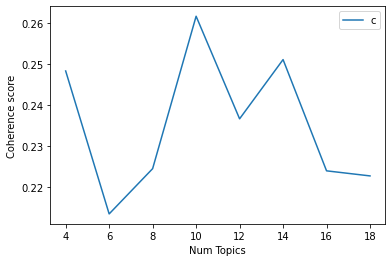

Num Topics = 4  has Coherence Value of 0.2484
Num Topics = 6  has Coherence Value of 0.2135
Num Topics = 8  has Coherence Value of 0.2246
Num Topics = 10  has Coherence Value of 0.2617
Num Topics = 12  has Coherence Value of 0.2367
Num Topics = 14  has Coherence Value of 0.2512
Num Topics = 16  has Coherence Value of 0.224
Num Topics = 18  has Coherence Value of 0.2228


In [86]:
import matplotlib.pyplot as plt
# Show graph
limit=20; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [87]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary)

In [88]:
#top 10 keywords along with probability for each keyword.

for idx, topic in lda_model_tfidf.print_topics(-1, num_words=10):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))
    print ('======================================================================================================================')
    #print out keywords only (without probability)
    #key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    #print ('Topic:',idx,key_words_only)

Topic: 0 Word: 0.048*"capacity" + 0.041*"pass" + 0.039*"close" + 0.038*"rid" + 0.035*"suppose" + 0.033*"line" + 0.032*"experience" + 0.032*"universal" + 0.032*"food" + 0.032*"visit"
Topic: 1 Word: 0.055*"park" + 0.048*"singapore" + 0.047*"money" + 0.042*"people" + 0.040*"ride" + 0.036*"theme" + 0.035*"book" + 0.032*"go" + 0.029*"universal" + 0.028*"time"
Topic: 2 Word: 0.058*"ticket" + 0.057*"queue" + 0.045*"time" + 0.039*"show" + 0.036*"terrible" + 0.033*"pass" + 0.029*"place" + 0.029*"food" + 0.028*"hours" + 0.027*"experience"


In [89]:
list_in_list=[]

doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf)
#print('document topics: ', doc_topics)

for each_doc in doc_topics:
    
    top_topic=sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    #print ("highest",top_topic)
    top_topic_num=top_topic[0]
    top_topic_prob=top_topic[1]
    #make a dataframe and fill out within each column.        
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])

print ("complete")  

complete


In [90]:

df = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df[:10])

   Dominant Topic  Probability
0               1     0.791822
1               0     0.786918
2               2     0.817498
3               2     0.739216
4               1     0.786166
5               2     0.579567
6               2     0.660680
7               1     0.798394
8               0     0.814492
9               1     0.821210


In [91]:
df_freq = pd.DataFrame(df['Dominant Topic'].value_counts())
df_freq.columns=['Frequency']
print (df_freq)

   Frequency
1         15
2         10
0          6


In [92]:
japan_reviews_postcovid_positive = japan_reviews_postcovid[japan_reviews_postcovid['label'] == 1.0]
japan_reviews_postcovid_negative = japan_reviews_postcovid[japan_reviews_postcovid['label'] == 0.0]

japan_reviews_postcovid_positive

rating       written_date  \
30621       5       May 27, 2021   
30623       5  February 21, 2021   
30624       5   December 7, 2020   
30625       4  November 18, 2020   
30626       5  November 18, 2020   
30627       4   November 1, 2020   
30628       5   October 24, 2020   
30629       4   October 22, 2020   
30630       5    October 5, 2020   
30632       5      July 13, 2020   
30633       4      June 26, 2020   
30634       5       June 3, 2020   
30635       5       May 28, 2020   
30636       5        May 6, 2020   
30637       5      April 9, 2020   
30638       5     March 19, 2020   
30639       5     March 17, 2020   
30640       5      March 9, 2020   

                                             review_text  \
30621  日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...   
30623  Love USJ! There's something they do different ...   
30624  We went to USJ without purchasing any tickets ...   
30625  I buy the annual pass each year and I wonder w...   
30626  We bought our tickets through KKday for easy a...   
30627  This was for my sons 10th birthday and my wife...   
30628  The experience was the best we have had at an ...   
30629  I liked it here because of the sun at lost her...   
30630  All i have felt was great. Fantastic. So happy...   
30632  We live in Kansai and were able to visit in Ju...   
30633  A great day out, lots of unique things you nev...   
30634  My favorite part of my experience is the Harry...   
30635  There are various zones such as Harry Poter, M...   
30636  I went there in the late Morning and i spent t...   
30637  We’re frequent visitors to the Hollywood and O...   
30638  I've been to USJ three time with my family alr...   
30639  The rides where great and the Spiderman ride i...   
30640  Your Osaka trip is not complete if you not com...   

                        branch  label  
30621  Universal Studios Japan    1.0  
30623  Universal Studios Japan    1.0  
30624  Universal Studios Japan    1.0  
30625  Universal Studios Japan    1.0  
30626  Universal Studios Japan    1.0  
30627  Universal Studios Japan    1.0  
30628  Universal Studios Japan    1.0  
30629  Universal Studios Japan    1.0  
30630  Universal Studios Japan    1.0  
30632  Universal Studios Japan    1.0  
30633  Universal Studios Japan    1.0  
30634  Universal Studios Japan    1.0  
30635  Universal Studios Japan    1.0  
30636  Universal Studios Japan    1.0  
30637  Universal Studios Japan    1.0  
30638  Universal Studios Japan    1.0  
30639  Universal Studios Japan    1.0  
30640  Universal Studios Japan    1.0

In [93]:
def lemmatize_text(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
  
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_text(token))
    return result

japan_reviews_postcovid_positive['processed_text']=japan_reviews_postcovid_positive['review_text'].map(preprocess)
print (japan_reviews_postcovid_positive.iloc[:10,:]) 

       rating       written_date  \
30621       5       May 27, 2021   
30623       5  February 21, 2021   
30624       5   December 7, 2020   
30625       4  November 18, 2020   
30626       5  November 18, 2020   
30627       4   November 1, 2020   
30628       5   October 24, 2020   
30629       4   October 22, 2020   
30630       5    October 5, 2020   
30632       5      July 13, 2020   

                                             review_text  \
30621  日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...   
30623  Love USJ! There's something they do different ...   
30624  We went to USJ without purchasing any tickets ...   
30625  I buy the annual pass each year and I wonder w...   
30626  We bought our tickets through KKday for easy a...   
30627  This was for my sons 10th birthday and my wife...   
30628  The experience was the best we have had at an ...   
30629  I liked it here because of the sun at lost her...   
30630  All i have felt was great. Fantastic. So happy...   
306

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [94]:
dictionary = gensim.corpora.Dictionary(japan_reviews_postcovid_positive['processed_text'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
print (len(japan_reviews_postcovid_positive))
print (len(dictionary)) 

0 appearance
1 architectural
2 architecture
3 aspect
4 attractive
5 beautiful
6 bring
7 countries
8 cuisines
9 dazzle
10 differences
11 distinctive
12 focus
13 gold
14 japan
15 japanese
16 local
17 memories
18 opinions
19 osaka
20 personal
18
309


In [95]:
dictionary.filter_extremes(no_below=3, no_above=0.90)
print (len(dictionary))
print (dictionary)

38
Dictionary(38 unique tokens: ['japanese', 'osaka', 'unique', 'different', 'dinosaur']...)


In [96]:
bow_corpus = [dictionary.doc2bow(doc) for doc in japan_reviews_postcovid_positive['processed_text']]
print (len(bow_corpus))
print (bow_corpus[0])
#pretiffy the above result.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

18
[(0, 1), (1, 1), (2, 1)]
Word 0 ("japanese") appears 1 time.
Word 1 ("osaka") appears 1 time.
Word 2 ("unique") appears 1 time.


In [97]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.5639365944583361), (1, 0.4802714754470485), (2, 0.6717996928420327)]


In [98]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary)

In [99]:
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=7):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))
    print ('======================================================================================================================')
    #print out keywords only (without probability)
    #key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    #print ('Topic:',idx,key_words_only)

Topic: 0 Word: 0.081*"unique" + 0.061*"japanese" + 0.053*"like" + 0.052*"great" + 0.042*"osaka" + 0.038*"dinosaur" + 0.037*"park"
Topic: 1 Word: 0.046*"best" + 0.044*"great" + 0.041*"amaze" + 0.038*"spiderman" + 0.037*"pass" + 0.037*"rid" + 0.037*"want"
Topic: 2 Word: 0.058*"go" + 0.047*"experience" + 0.046*"rid" + 0.043*"attractions" + 0.041*"time" + 0.038*"visit" + 0.037*"different"


In [100]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=japan_reviews_postcovid_positive['processed_text'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=japan_reviews_postcovid_positive['processed_text'], start=4, limit=20, step=2)


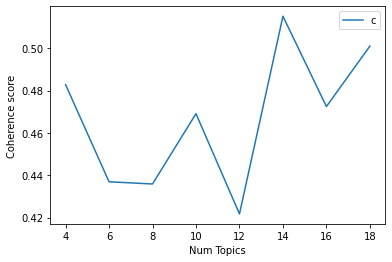

Num Topics = 4  has Coherence Value of 0.4828
Num Topics = 6  has Coherence Value of 0.4369
Num Topics = 8  has Coherence Value of 0.4359
Num Topics = 10  has Coherence Value of 0.4691
Num Topics = 12  has Coherence Value of 0.4218
Num Topics = 14  has Coherence Value of 0.5151
Num Topics = 16  has Coherence Value of 0.4725
Num Topics = 18  has Coherence Value of 0.501


In [101]:
import matplotlib.pyplot as plt
# Show graph
limit=20; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [102]:
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary)

In [103]:
#top 10 keywords along with probability for each keyword.

for idx, topic in lda_model_tfidf.print_topics(-1, num_words=7):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {}'.format(idx, topic))
    print ('======================================================================================================================')
    #print out keywords only (without probability)
    #key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    #print ('Topic:',idx,key_words_only)

Topic: 0 Word: 0.053*"japanese" + 0.042*"time" + 0.040*"go" + 0.037*"pass" + 0.036*"attractions" + 0.036*"rid" + 0.035*"want"
Topic: 1 Word: 0.070*"great" + 0.062*"like" + 0.056*"unique" + 0.047*"place" + 0.041*"amaze" + 0.038*"osaka" + 0.038*"park"
Topic: 2 Word: 0.047*"experience" + 0.045*"different" + 0.044*"rid" + 0.044*"recommend" + 0.042*"ride" + 0.034*"best" + 0.034*"dinosaur"


In [104]:
list_in_list=[]

doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf)
#print('document topics: ', doc_topics)

for each_doc in doc_topics:
    
    top_topic=sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    #print ("highest",top_topic)
    top_topic_num=top_topic[0]
    top_topic_prob=top_topic[1]
    #make a dataframe and fill out within each column.        
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])

print ("complete")  

complete


In [105]:
df = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df[:10])

   Dominant Topic  Probability
0               0     0.652561
1               2     0.797365
2               0     0.728327
3               0     0.742688
4               0     0.814459
5               0     0.810011
6               2     0.784662
7               0     0.451022
8               2     0.813269
9               0     0.799398


In [106]:
df_freq = pd.DataFrame(df['Dominant Topic'].value_counts())
df_freq.columns=['Frequency']
print (df_freq)

   Frequency
0          9
2          7
1          2
